In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense, Input

#### Đọc dữ liệu từ 5 tập đoàn

In [2]:
vnm = pd.read_csv("/kaggle/input/vnmvnm/VNM.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
vnm

Date    Price     Open     High      Low     Vol. Change %
0    2024-12-31  63400.0  63400.0  63800.0  63300.0    1.64M    0.16%
1    2024-12-30  63300.0  63600.0  63700.0  63300.0    1.49M   -0.78%
2    2024-12-27  63800.0  63900.0  64100.0  63700.0    2.44M    0.00%
3    2024-12-26  63800.0  64200.0  64200.0  63800.0    1.71M   -0.16%
4    2024-12-25  63900.0  63900.0  64396.1  63900.0    1.30M    0.16%
...         ...      ...      ...      ...      ...      ...      ...
2863 2013-07-16  96528.0  95139.0  97222.0  95139.0  729.69K    1.46%
2864 2013-07-15  95139.0  95139.0  95833.0  94444.0  176.98K    0.00%
2865 2013-07-12  95139.0  94444.0  95139.0  93750.0  220.82K    0.74%
2866 2013-07-11  94444.0  94444.0  95139.0  93750.0  161.84K    0.00%
2867 2013-07-10  94444.0  95139.0  95833.0  94444.0  232.11K    0.00%

[2868 rows x 7 columns]

In [3]:
hag = pd.read_csv("/kaggle/input/bombardinocrocodilo/Hoang-Anh-Gia-Lai-JSC-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
hag

Date    Price     Open     High      Low    Vol. Change %
0    2024-12-31  12050.0  12250.0  12300.0  11900.0   7.39M    0.42%
1    2024-12-30  12000.0  12000.0  12150.0  11750.0   5.96M    0.00%
2    2024-12-27  12000.0  12500.0  12600.0  11950.0  15.72M   -4.00%
3    2024-12-26  12500.0  12550.0  12650.0  12500.0   4.40M    0.00%
4    2024-12-25  12500.0  12750.0  12850.0  12500.0   5.67M   -1.96%
...         ...      ...      ...      ...      ...     ...      ...
2989 2013-01-08  20962.0  20312.0  20962.0  20068.0   3.03M    4.88%
2990 2013-01-07  19987.0  19093.0  19987.0  19093.0   3.36M    4.68%
2991 2013-01-04  19093.0  18281.0  19256.0  18118.0   1.92M    3.98%
2992 2013-01-03  18362.0  18118.0  18524.0  17712.0   1.10M    1.35%
2993 2013-01-02  18118.0  17712.0  18362.0  17631.0   1.87M    3.24%

[2994 rows x 7 columns]

In [4]:
hpg = pd.read_csv("/kaggle/input/bombardinocrocodilo/Hoa-Phat-Group-JSC-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
hpg

Date    Price     Open     High      Low    Vol. Change %
0    2024-12-31  26650.0  26750.0  26750.0  26600.0  10.25M   -0.37%
1    2024-12-30  26750.0  26800.0  26850.0  26650.0  12.17M   -0.37%
2    2024-12-27  26850.0  27000.0  27000.0  26800.0  11.39M   -0.56%
3    2024-12-26  27000.0  27150.0  27200.0  26850.0   9.98M   -0.55%
4    2024-12-25  27150.0  26750.0  27150.0  26750.0  17.14M    1.69%
...         ...      ...      ...      ...      ...     ...      ...
2989 2013-01-08   1700.5   1693.4   1707.5   1672.3  18.03M    4.33%
2990 2013-01-07   1629.9   1495.9   1629.9   1495.9  11.28M    5.00%
2991 2013-01-04   1552.3   1510.0   1573.5   1495.9   6.94M    3.29%
2992 2013-01-03   1502.9   1481.7   1502.9   1467.6   8.77M    0.95%
2993 2013-01-02   1488.8   1481.7   1495.9   1467.6   6.60M    0.48%

[2994 rows x 7 columns]

In [5]:
mbb = pd.read_csv("/kaggle/input/bombardinocrocodilo/Military-Commercial-Bank-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
mbb

Date    Price     Open     High      Low    Vol. Change %
0    2024-12-31  21826.0  21565.0  21826.0  21565.0  12.93M    1.21%
1    2024-12-30  21565.0  21870.0  21870.0  21565.0  12.72M   -1.00%
2    2024-12-27  21783.0  21783.0  22000.0  21739.0  19.21M    0.61%
3    2024-12-26  21652.0  21304.0  21652.0  21261.0  22.89M    1.84%
4    2024-12-25  21261.0  20826.0  21565.0  20826.0  17.04M    2.30%
...         ...      ...      ...      ...      ...     ...      ...
2989 2013-01-08   3769.4   3603.1   3797.1   3603.1  15.27M    3.82%
2990 2013-01-07   3630.8   3603.1   3658.5   3575.4   4.67M    0.77%
2991 2013-01-04   3603.1   3575.4   3630.8   3519.9   4.02M    0.77%
2992 2013-01-03   3575.4   3658.5   3658.5   3519.9   5.80M   -1.53%
2993 2013-01-02   3630.8   3492.2   3630.8   3492.2   9.96M    4.80%

[2994 rows x 7 columns]

In [6]:
fpt = pd.read_csv("/kaggle/input/bombardinocrocodilo/FPT-Corp-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
fpt

Date     Price      Open      High       Low     Vol. Change %
0    2024-12-31  152500.0  150700.0  153900.0  150300.0    3.60M    1.33%
1    2024-12-30  150500.0  149400.0  150800.0  148500.0    1.98M    0.60%
2    2024-12-27  149600.0  149500.0  149900.0  148700.0    2.56M   -0.13%
3    2024-12-26  149800.0  151000.0  151400.0  149100.0    2.23M   -0.66%
4    2024-12-25  150800.0  150600.0  151200.0  150400.0    2.51M    0.27%
...         ...       ...       ...       ...       ...      ...      ...
2989 2013-01-08    7044.1    6728.9    7044.1    6710.4    2.05M    4.97%
2990 2013-01-07    6710.4    6710.4    6766.0    6673.3  780.75K   -0.55%
2991 2013-01-04    6747.5    6617.7    6747.5    6599.2    1.06M    1.39%
2992 2013-01-03    6654.8    6747.5    6784.5    6543.6    1.40M   -1.37%
2993 2013-01-02    6747.5    6543.6    6784.5    6543.6    1.45M    3.41%

[2994 rows x 7 columns]

Đổi lại tên các cột trong bảng vnm sang tiếng Anh + chuyển đổi đơn vị

In [7]:
# # Đổi tên các cột thành tiếng Anh cho dễ làm việc
# vnm.rename(columns={
#     "Ngày": "Date",
#     "Lần cuối": "Price",
#     "Mở": "Open",
#     "Cao": "High",
#     "Thấp": "Low",
#     "KL": "Vol.",
#     "% Thay đổi": "Change %",
# }, inplace = True)
# vnm

In [8]:
#convert M L K trong cột KL thành số thực
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        if vol_str[-1] == 'M':
            return float(vol_str[:-1]) * 1_000_000
        elif vol_str[-1] == 'K':
            return float(vol_str[:-1]) * 1_000
    return float(vol_str)

for deiter in [vnm, hag, hpg, fpt, mbb]:
    deiter['Vol.'] = deiter['Vol.'].apply(convert_volume)
    # deiter.sort_values('Date', inplace = True)
    deiter = deiter.ffill()

In [9]:
for deiter in [vnm, hag, hpg, fpt, mbb]:
    deiter.sort_values('Date', inplace = True)

In [10]:
vnm

Date    Price     Open     High      Low       Vol. Change %
2867 2013-07-10  94444.0  95139.0  95833.0  94444.0   232110.0    0.00%
2866 2013-07-11  94444.0  94444.0  95139.0  93750.0   161840.0    0.00%
2865 2013-07-12  95139.0  94444.0  95139.0  93750.0   220820.0    0.74%
2864 2013-07-15  95139.0  95139.0  95833.0  94444.0   176980.0    0.00%
2863 2013-07-16  96528.0  95139.0  97222.0  95139.0   729690.0    1.46%
...         ...      ...      ...      ...      ...        ...      ...
4    2024-12-25  63900.0  63900.0  64396.1  63900.0  1300000.0    0.16%
3    2024-12-26  63800.0  64200.0  64200.0  63800.0  1710000.0   -0.16%
2    2024-12-27  63800.0  63900.0  64100.0  63700.0  2440000.0    0.00%
1    2024-12-30  63300.0  63600.0  63700.0  63300.0  1490000.0   -0.78%
0    2024-12-31  63400.0  63400.0  63800.0  63300.0  1640000.0    0.16%

[2868 rows x 7 columns]

In [11]:
for deiter in [vnm, hag, hpg, fpt, mbb]:
    deiter['DayOfWeek'] = deiter['Date'].dt.dayofweek

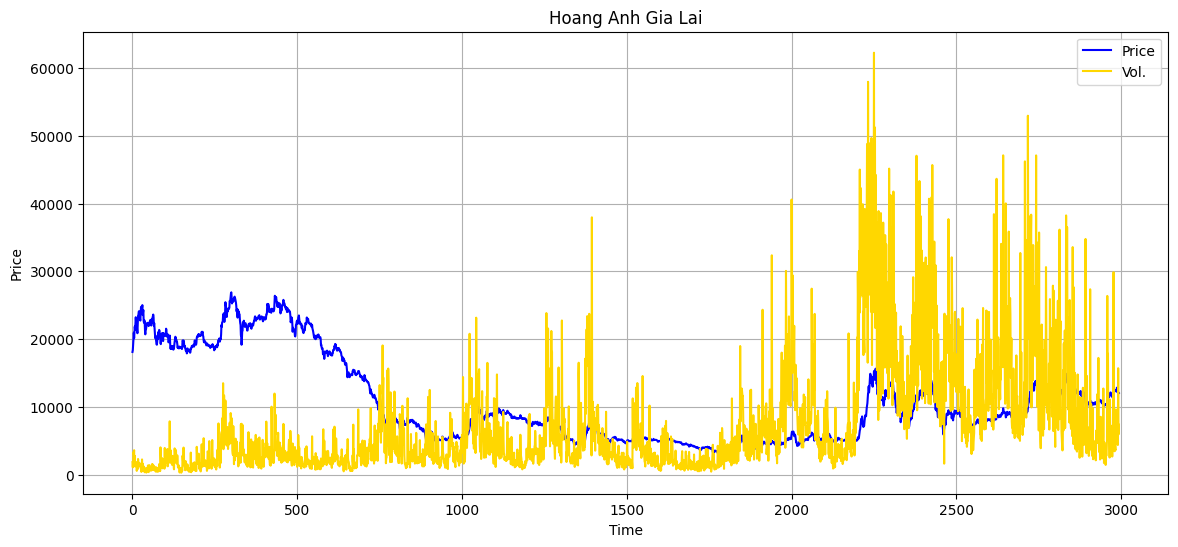

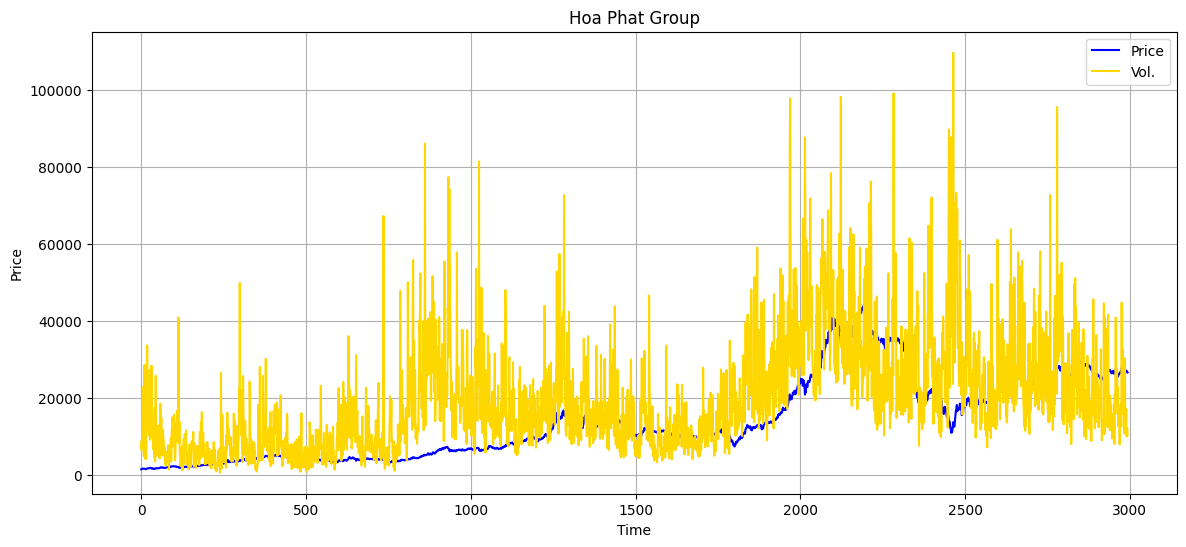

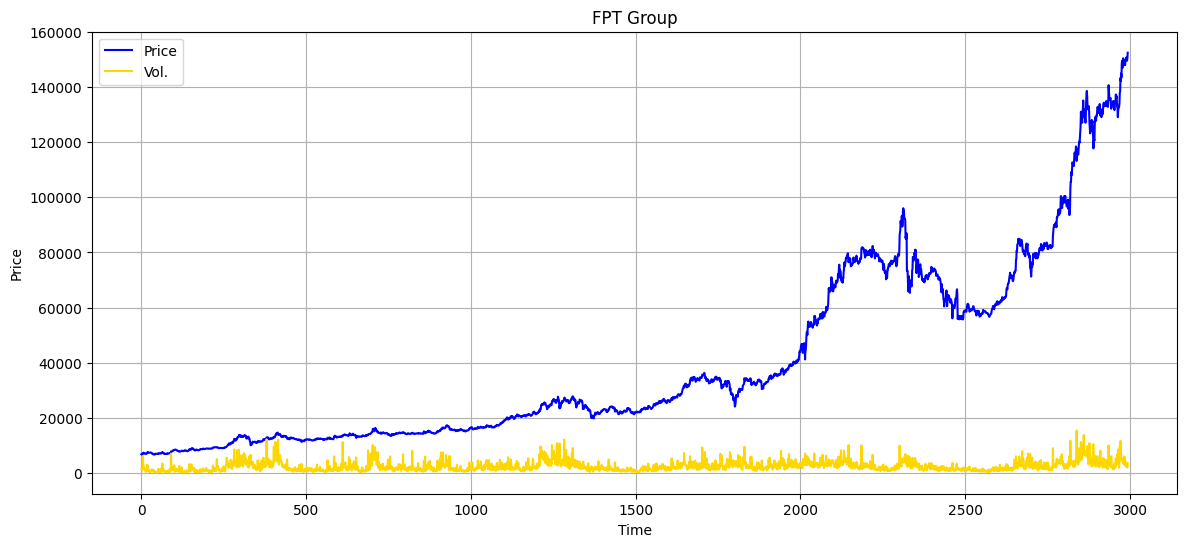

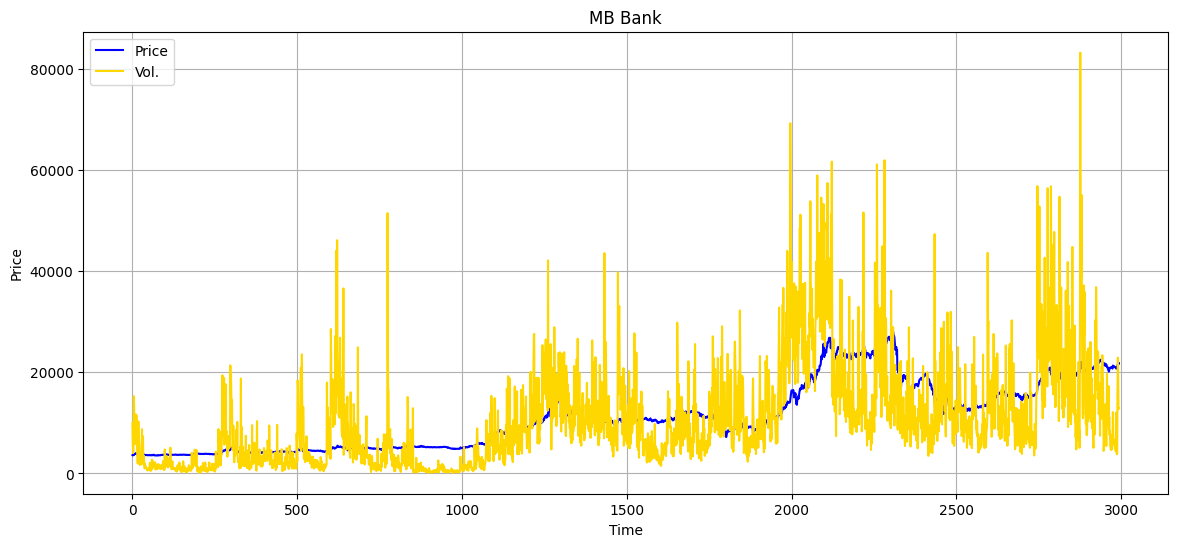

In [12]:
names_and_datas = [("Vinamilk", vnm), ("Hoang Anh Gia Lai", hag), ("Hoa Phat Group", hpg),
                    ("FPT Group", fpt), ("MB Bank", mbb)]

for neim, deiter in names_and_datas:
    plt.figure(figsize=(14,6))
    plt.plot(deiter['Price'].values, label='Price', color='blue')
    plt.plot(deiter['Vol.'].values/1000, label='Vol.', color='gold')
    plt.legend()
    plt.title(f'{neim}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

các hàm hỗ trợ

In [13]:
def add_target_columns(df):
    df['Target_5'] = df['Price'].shift(-5)
    df['Target_10'] = df['Price'].shift(-10)
    df['Target_20'] = df['Price'].shift(-20)
    # df['Target_50'] = df['Price'].shift(-50)
    # df['Target_100'] = df['Price'].shift(-100)

In [14]:
def add_features(df):
    #%chênh giá mở và đóng, chênh giá đỉnh và sàn
    df['Daily_Return'] = (df['Price'] - df['Open']) / df['Open']
    df['High_Low_Spread'] = (df['High'] - df['Low']) / df['Open']

    #xem xu hướng của giá cổ phiếu dựa trên trung bình 15, 10 và 20 ngày gần nhất
    df['MA5'] = df['Price'].rolling(window=5).mean()
    df['MA10'] = df['Price'].rolling(window=10).mean()
    df['MA20'] = df['Price'].rolling(window=20).mean()

    #xem độ biến động thông qua độ lệch chuẩn của giá 5 ngày
    df['Volatility_5'] = df['Price'].rolling(window=5).std()
    df['Volume_MA5'] = df['Vol.'].rolling(window=5).mean()
    df['Volume_Spike'] = (df['Vol.'] > 1.5 * df['Vol.'].rolling(window=20).mean()).astype(int)

In [15]:
for deiter in [vnm, hag, hpg, fpt, mbb]:
    add_features(deiter)
    add_target_columns(deiter)
    print(deiter.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'DayOfWeek',
       'Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 'MA20',
       'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'Target_5', 'Target_10',
       'Target_20'],
      dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'DayOfWeek',
       'Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 'MA20',
       'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'Target_5', 'Target_10',
       'Target_20'],
      dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'DayOfWeek',
       'Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 'MA20',
       'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'Target_5', 'Target_10',
       'Target_20'],
      dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'DayOfWeek',
       'Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 'MA20',
       'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'Tar

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [16]:
hag

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Date    Price     Open     High      Low        Vol. Change %  \
2993 2013-01-02  18118.0  17712.0  18362.0  17631.0   1870000.0    3.24%   
2992 2013-01-03  18362.0  18118.0  18524.0  17712.0   1100000.0    1.35%   
2991 2013-01-04  19093.0  18281.0  19256.0  18118.0   1920000.0    3.98%   
2990 2013-01-07  19987.0  19093.0  19987.0  19093.0   3360000.0    4.68%   
2989 2013-01-08  20962.0  20312.0  20962.0  20068.0   3030000.0    4.88%   
...         ...      ...      ...      ...      ...         ...      ...   
4    2024-12-25  12500.0  12750.0  12850.0  12500.0   5670000.0   -1.96%   
3    2024-12-26  12500.0  12550.0  12650.0  12500.0   4400000.0    0.00%   
2    2024-12-27  12000.0  12500.0  12600.0  11950.0  15720000.0   -4.00%   
1    2024-12-30  12000.0  12000.0  12150.0  11750.0   5960000.0    0.00%   
0    2024-12-31  12050.0  12250.0  12300.0  11900.0   7390000.0    0.42%   

      DayOfWeek  Daily_Return  High_Low_Spread      MA5     MA10     MA20  \
2993          2      0.022922         0.041271      NaN      NaN      NaN   
2992          3      0.013467         0.044817      NaN      NaN      NaN   
2991          4      0.044418         0.062250      NaN      NaN      NaN   
2990          0      0.046823         0.046823      NaN      NaN      NaN   
2989          1      0.032001         0.044013  19304.4      NaN      NaN   
...         ...           ...              ...      ...      ...      ...   
4             2     -0.019608         0.027451  12540.0  12485.0  12237.5   
3             3     -0.003984         0.011952  12570.0  12495.0  12265.0   
2             4     -0.040000         0.052000  12520.0  12455.0  12267.5   
1             0      0.000000         0.033333  12350.0  12405.0  12285.0   
0             1     -0.016327         0.032653  12210.0  12365.0  12297.5   

      Volatility_5  Volume_MA5  Volume_Spike  Target_5  Target_10  Target_20  
2993           NaN         NaN             0   20149.0    23237.0    24130.0  
2992           NaN         NaN             0   21124.0    22505.0    23399.0  
2991           NaN         NaN             0   21856.0    22749.0    23480.0  
2990           NaN         NaN             0   21368.0    22181.0    22912.0  
2989   1178.339213   2256000.0             0   22181.0    21368.0    22749.0  
...            ...         ...           ...       ...        ...        ...  
4       255.929678   6674000.0             0       NaN        NaN        NaN  
3       236.114379   6030000.0             0       NaN        NaN        NaN  
2       329.013678   7810000.0             1       NaN        NaN        NaN  
1       335.410197   7580000.0             0       NaN        NaN        NaN  
0       265.518361   7828000.0             0       NaN        NaN        NaN  

[2994 rows x 19 columns]

# Dùng RandomForest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBRegressor

2025-05-10 15:54:18.624941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746892458.849811      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746892458.915017      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
def prepare_data_for_predicting_n_days_ahead(tbl, n: str):
    if (n != '5' and n != '10' and  n != '20'):
        return 0
        
    X_cols = ['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek']
    y_col = ['Target_' + n]
    needed_cols = X_cols + y_col

    bombardino_crocodilo = tbl[needed_cols].ffill().bfill()
    X = bombardino_crocodilo[X_cols]
    y = bombardino_crocodilo[y_col]

    split_point = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
    y_train, y_test = y.iloc[:split_point], y.iloc[split_point:] 
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

### Helper Functions

In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
#sua tam de chay cho nhanh dung xoa di dm
model_rfr = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=10)
model_rfr_raw = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
def train(X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return y_pred

In [21]:
def plot_the_diff(y_test, y_pred, n: str, name: str):
    plt.figure(figsize=(14,6))
    plt.plot(y_test.values, label='Actual Price', color='blue')
    plt.plot(y_pred, label='Predicted Price', color='red')
    plt.legend()
    plt.title(f'{name}: Actual vs Predicted Prices ({n} days)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [22]:
def bombardino(df: pd.DataFrame, name: str, model):
    for n in ['5', '10', '20']:
        X_train, X_test, y_train, y_test = prepare_data_for_predicting_n_days_ahead(df, n)
        y_pred = train(X_train, X_test, y_train, y_test, model)
        plot_the_diff(y_test, y_pred, n, name)

## Vinamilk

(2294, 9) (574, 9) (2294, 1) (574, 1)
Mean Squared Error (MSE): 7249444.49
R^2 Score: 0.49


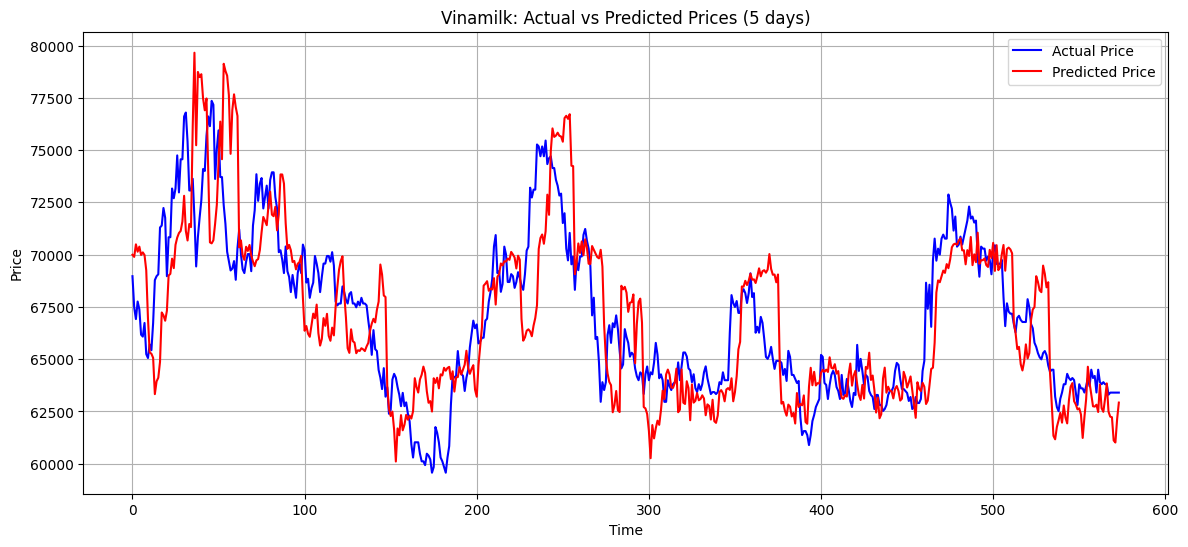

(2294, 9) (574, 9) (2294, 1) (574, 1)
Mean Squared Error (MSE): 11349202.20
R^2 Score: 0.20


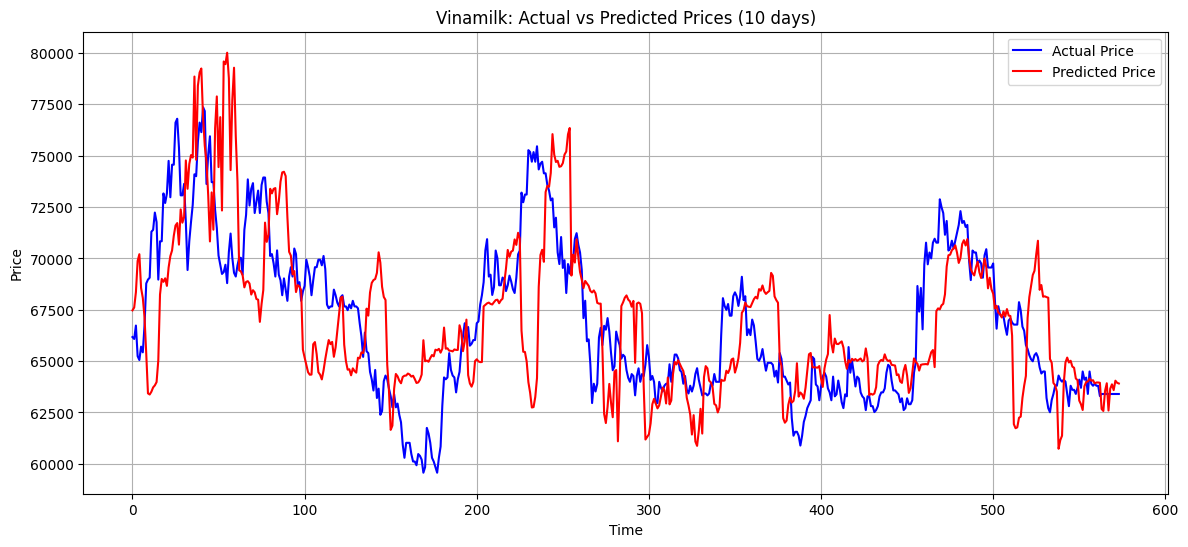

(2294, 9) (574, 9) (2294, 1) (574, 1)
Mean Squared Error (MSE): 20055422.43
R^2 Score: -0.39


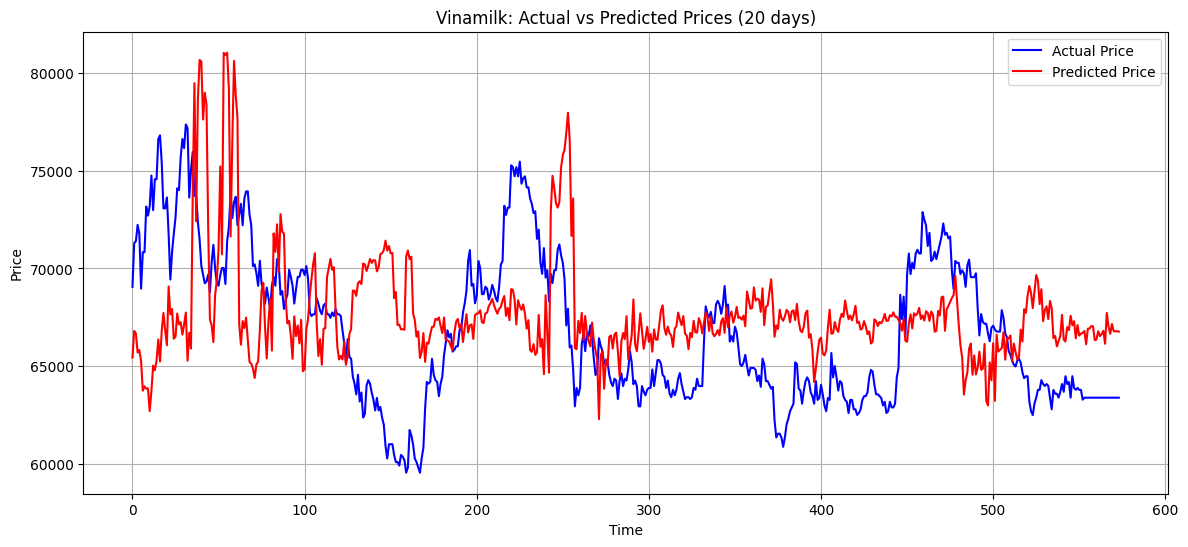

In [23]:
bombardino(vnm, 'Vinamilk', model_rfr_raw)

## Hoang Anh Gia Lai

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 1136494.08
R^2 Score: 0.77


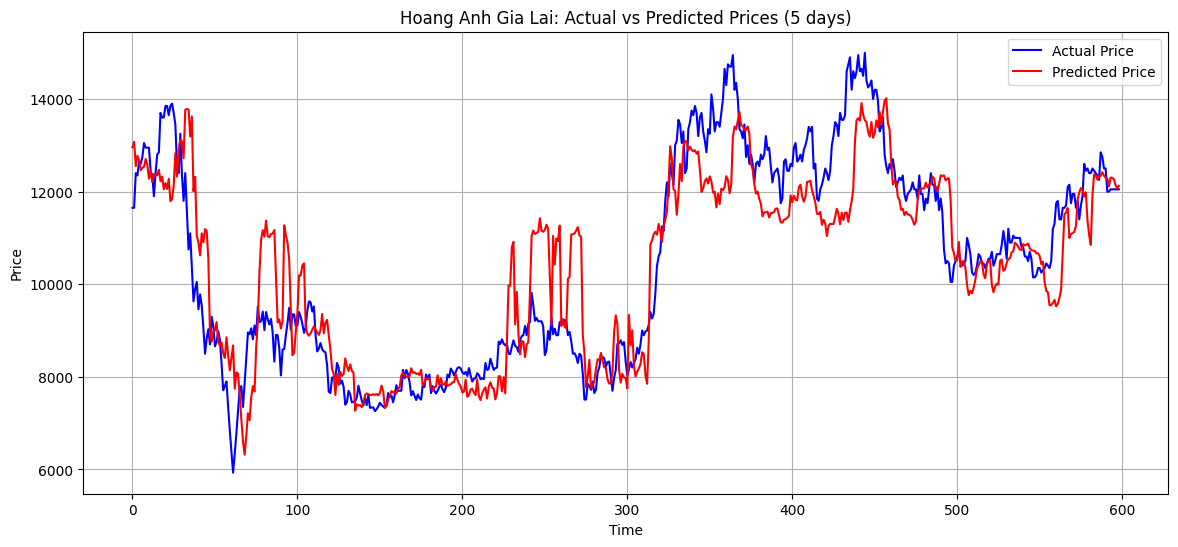

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 2500894.12
R^2 Score: 0.49


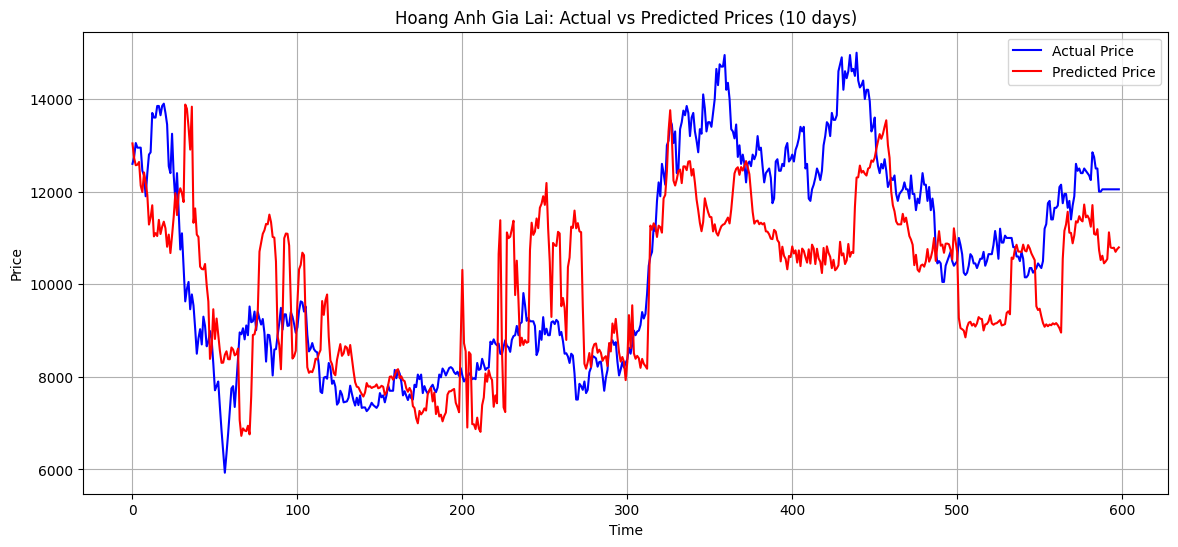

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 5724100.28
R^2 Score: -0.18


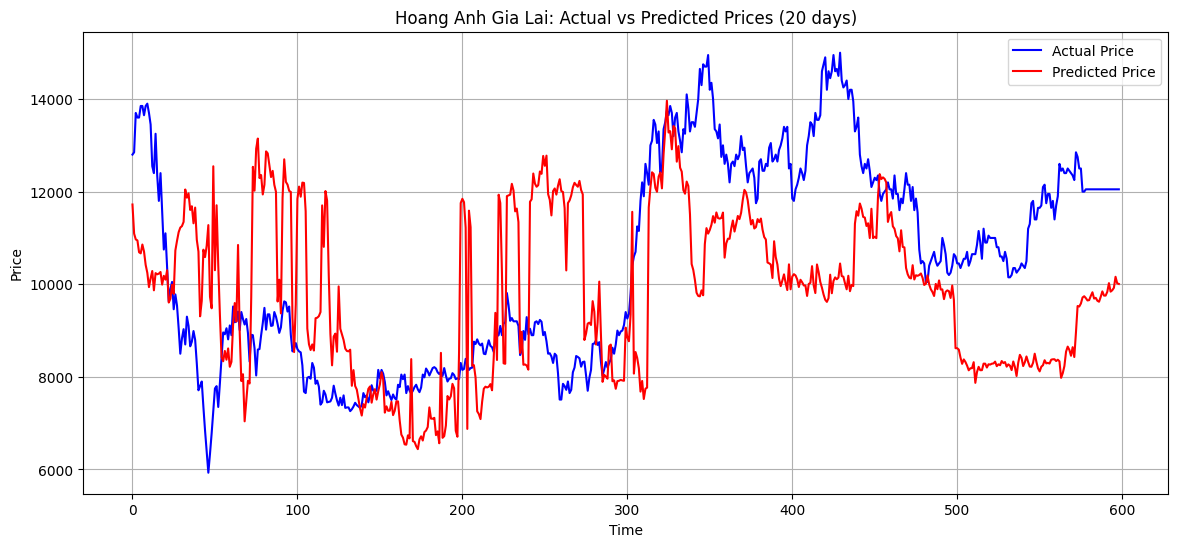

In [24]:
bombardino(hag, 'Hoang Anh Gia Lai', model_rfr_raw)

## Hoa Phat Group

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 3128208.23
R^2 Score: 0.82


(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 7892423.48
R^2 Score: 0.55


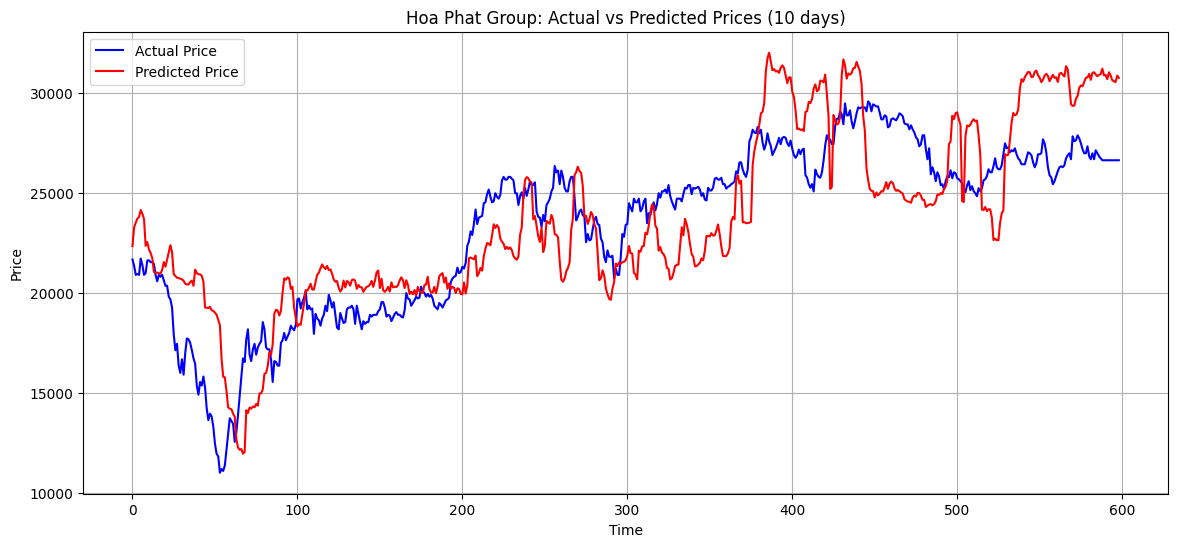

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 15699440.53
R^2 Score: 0.10


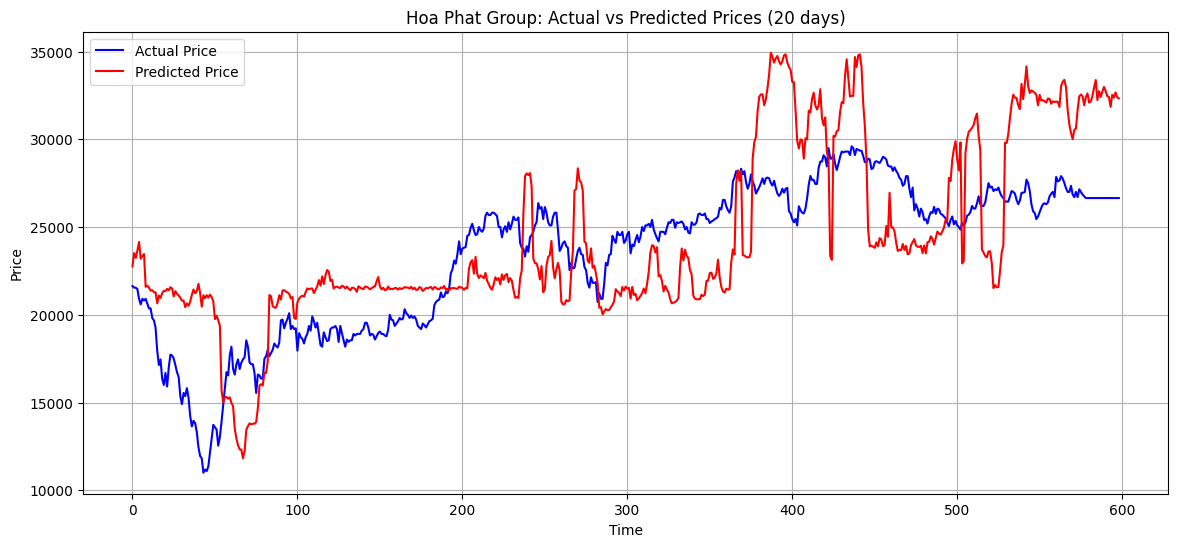

In [25]:
bombardino(hpg, 'Hoa Phat Group', model_rfr_raw)

## FPT Group

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 837707271.99
R^2 Score: 0.07


(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 1300389992.24
R^2 Score: -0.40


(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 1414564335.14
R^2 Score: -0.43


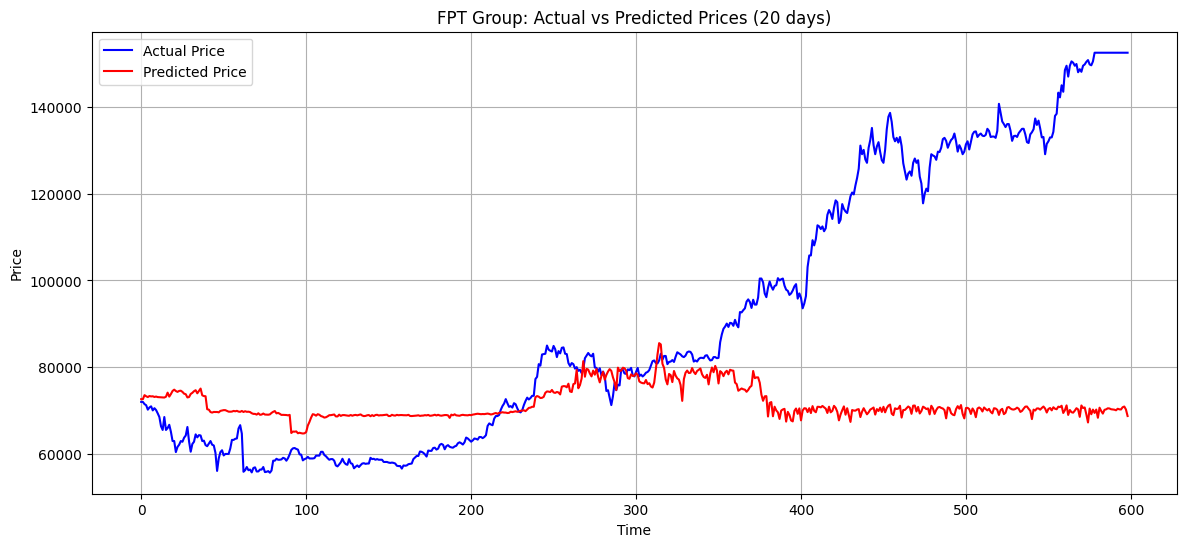

In [26]:
bombardino(fpt, 'FPT Group', model_rfr_raw)

## MB Bank

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 2088098.95
R^2 Score: 0.79


(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 2914767.06
R^2 Score: 0.71


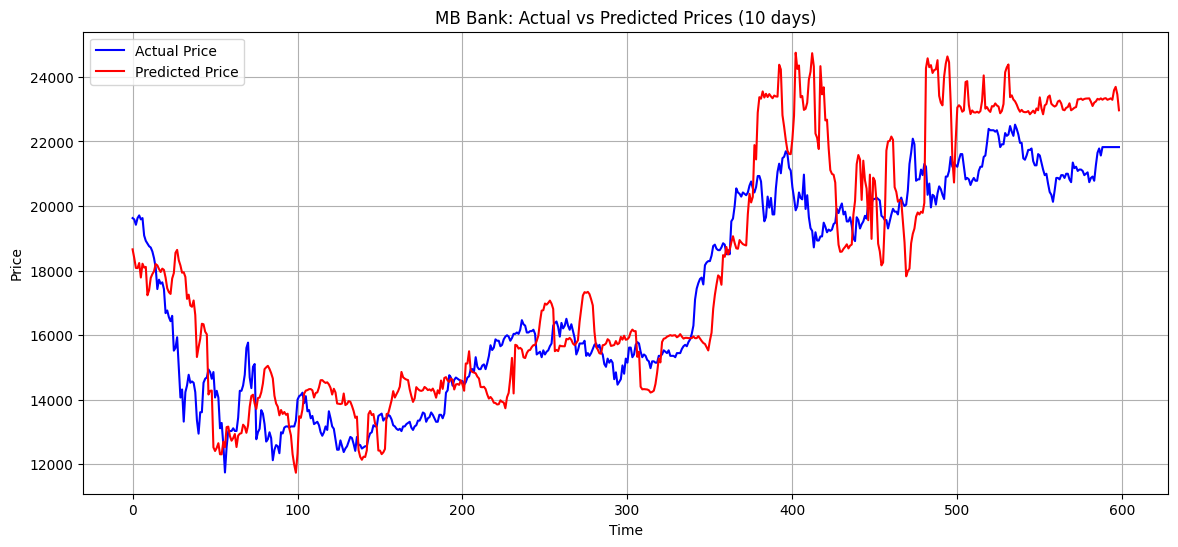

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 5193382.82
R^2 Score: 0.50


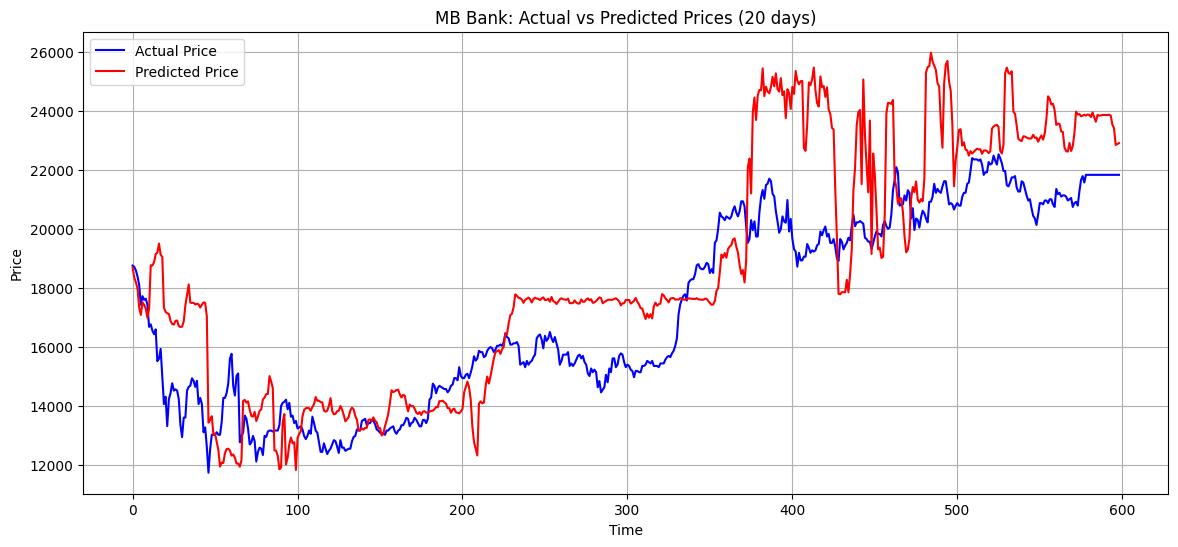

In [27]:
bombardino(mbb, 'MB Bank', model_rfr_raw)

# Dùng XGBoost 

In [28]:
param_grid_x = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}
#sua tam de chay cho nhanh dung xoa di dm
model_xgbr = RandomizedSearchCV(XGBRegressor(), param_grid_x, cv=3, scoring='neg_mean_squared_error', n_iter=10)
model_xgbr_raw = RandomForestRegressor(n_estimators=100, random_state=42)

## Vinamilk

(2294, 9) (574, 9) (2294, 1) (574, 1)
Mean Squared Error (MSE): 7249444.49
R^2 Score: 0.49


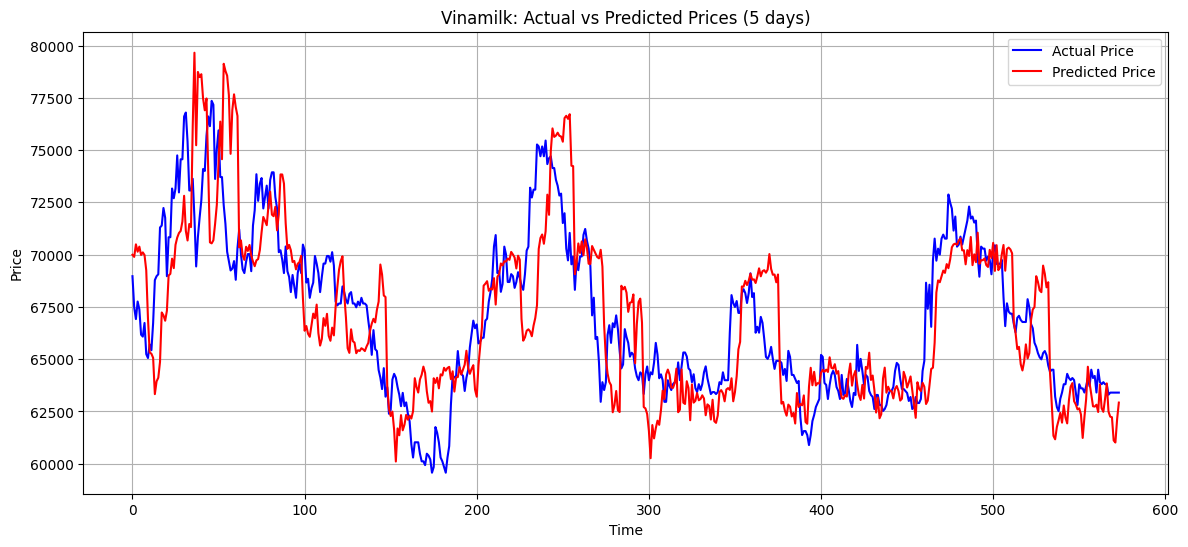

(2294, 9) (574, 9) (2294, 1) (574, 1)
Mean Squared Error (MSE): 11349202.20
R^2 Score: 0.20


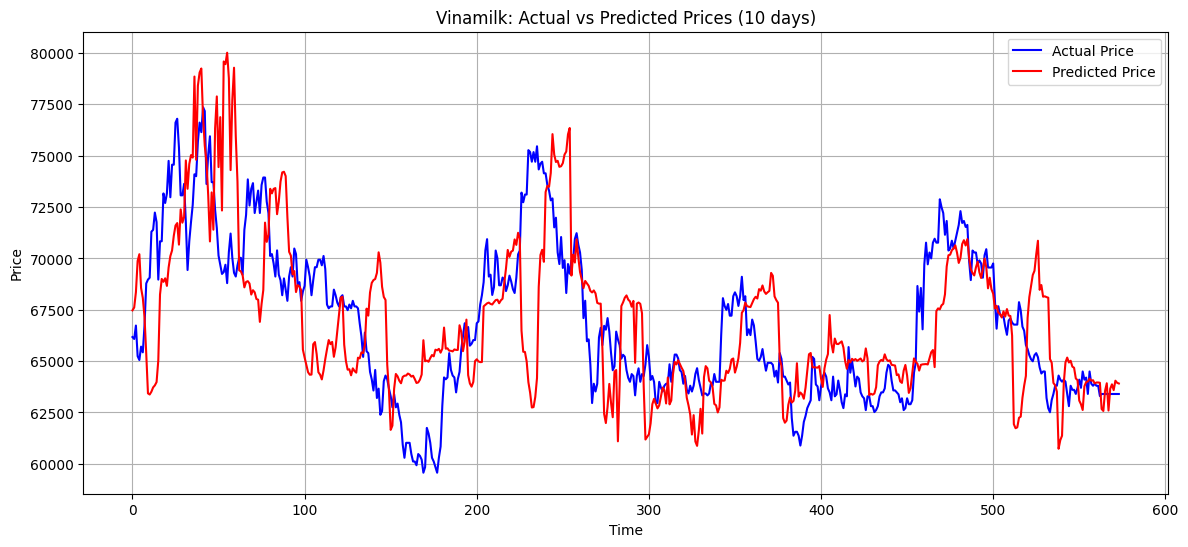

(2294, 9) (574, 9) (2294, 1) (574, 1)
Mean Squared Error (MSE): 20055422.43
R^2 Score: -0.39


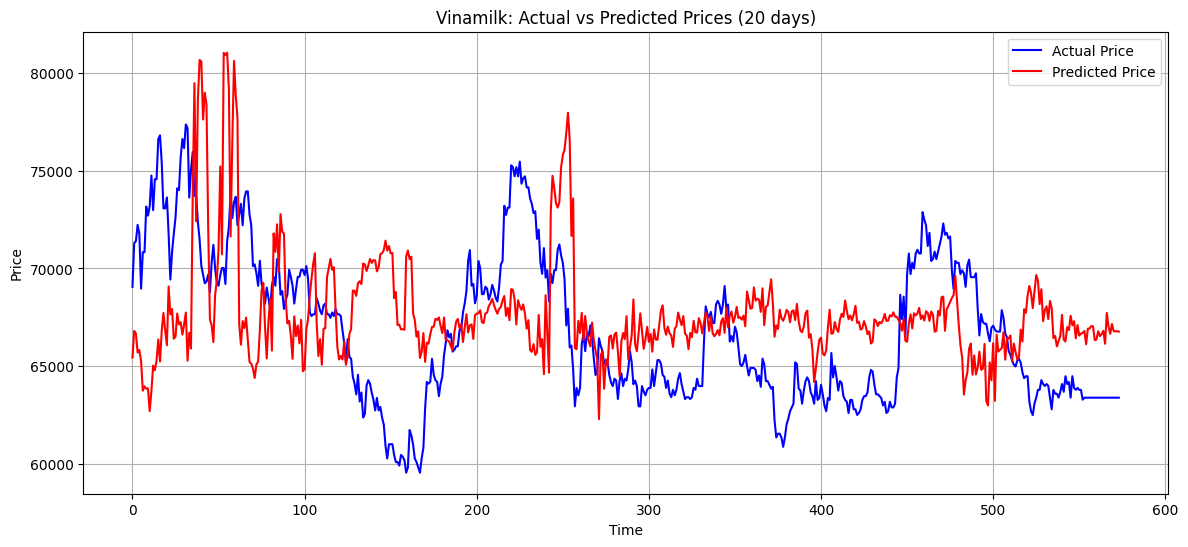

In [29]:
bombardino(vnm, 'Vinamilk', model_xgbr_raw)

## Hoang Anh Gia Lai

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 1136494.08
R^2 Score: 0.77


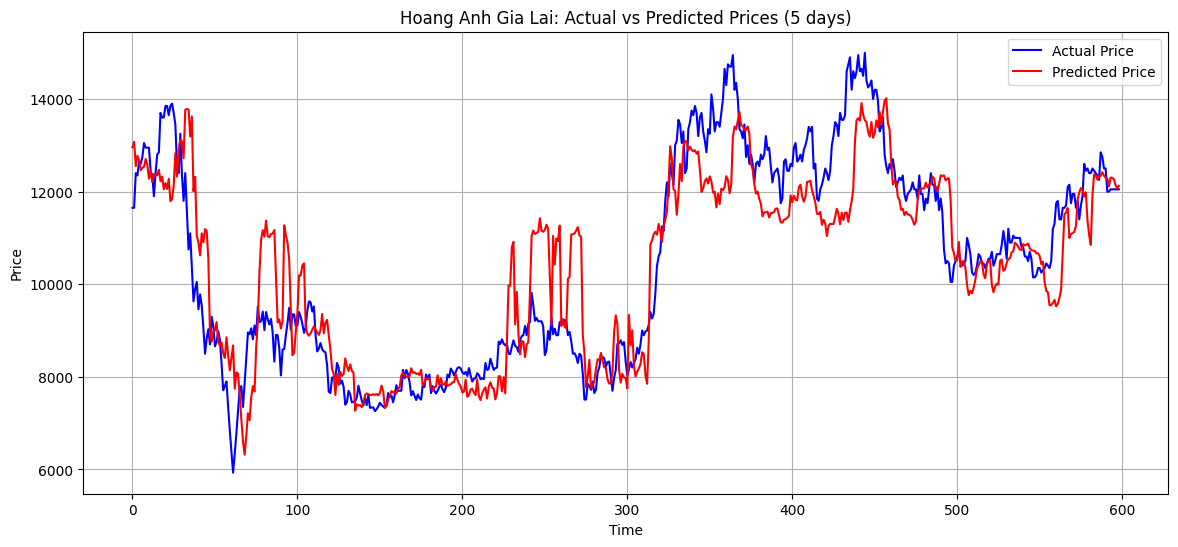

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 2500894.12
R^2 Score: 0.49


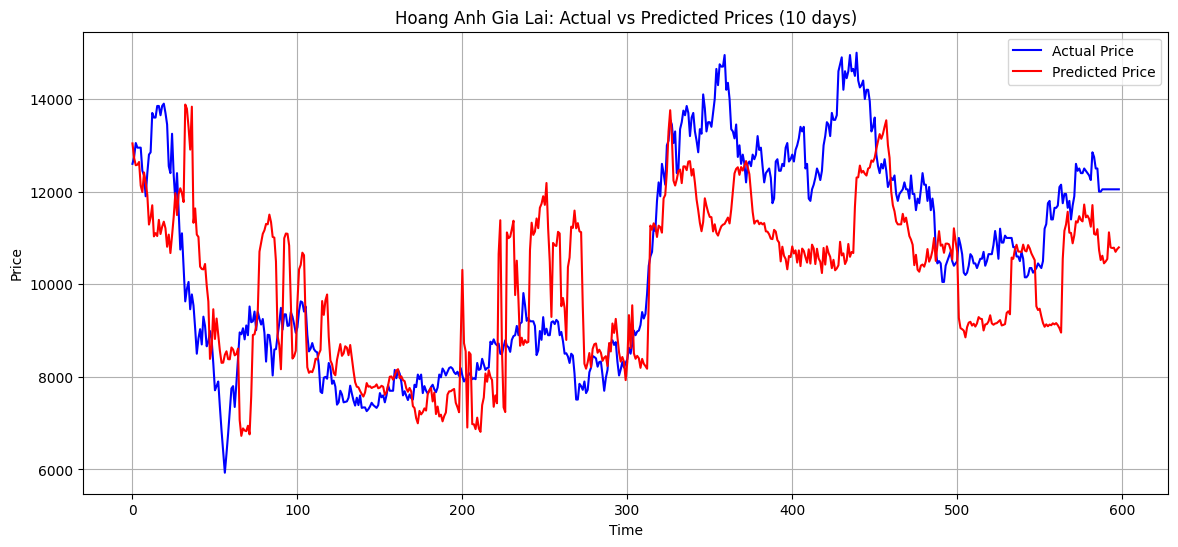

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 5724100.28
R^2 Score: -0.18


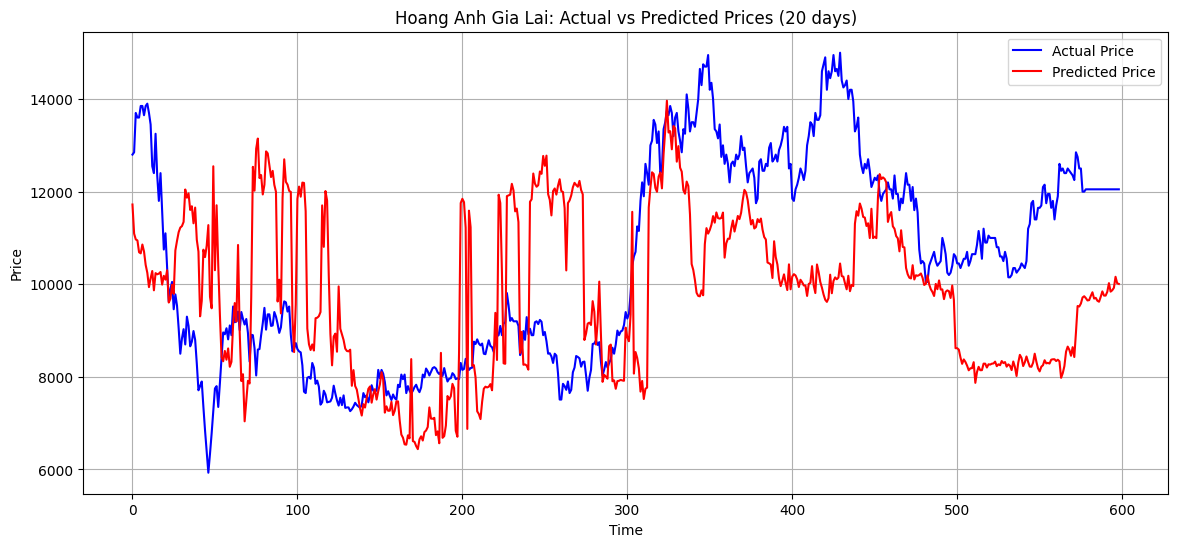

In [30]:
bombardino(hag, 'Hoang Anh Gia Lai', model_xgbr_raw)

## Hoa Phat Group

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 3128208.23
R^2 Score: 0.82


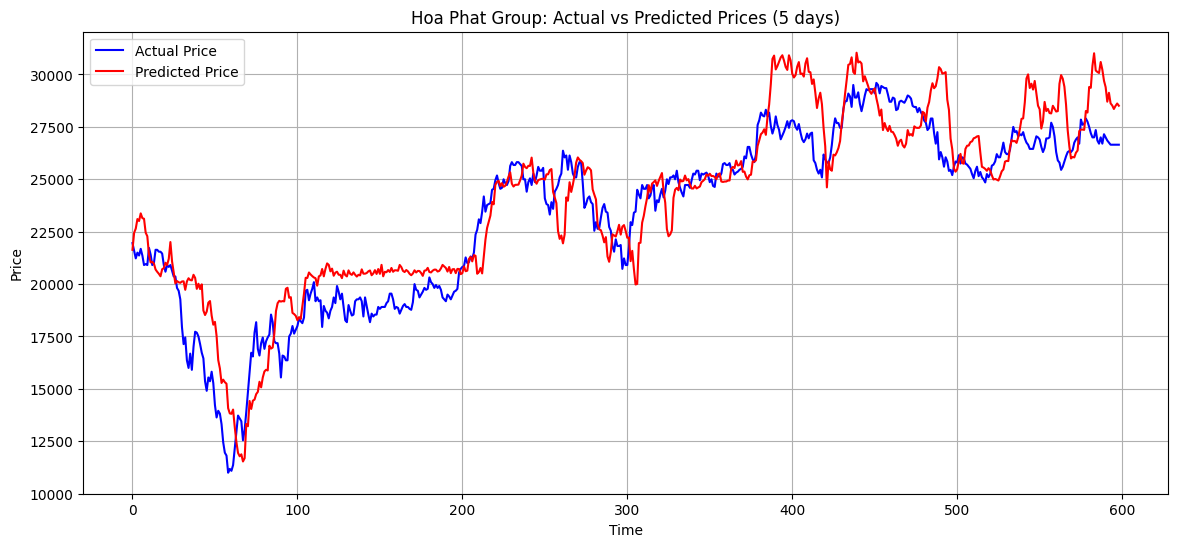

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 7892423.48
R^2 Score: 0.55


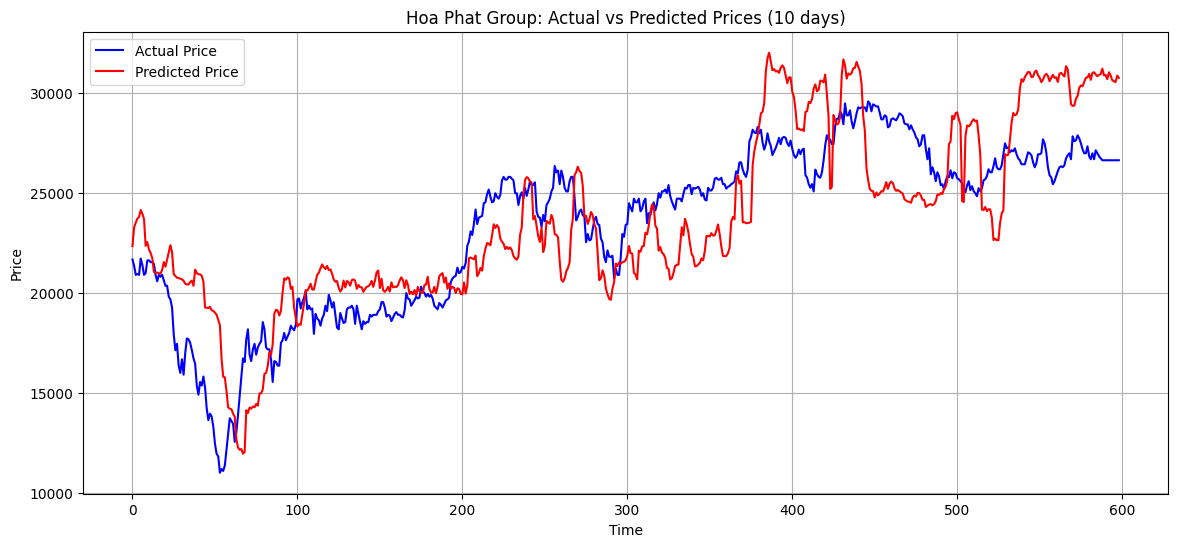

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 15699440.53
R^2 Score: 0.10


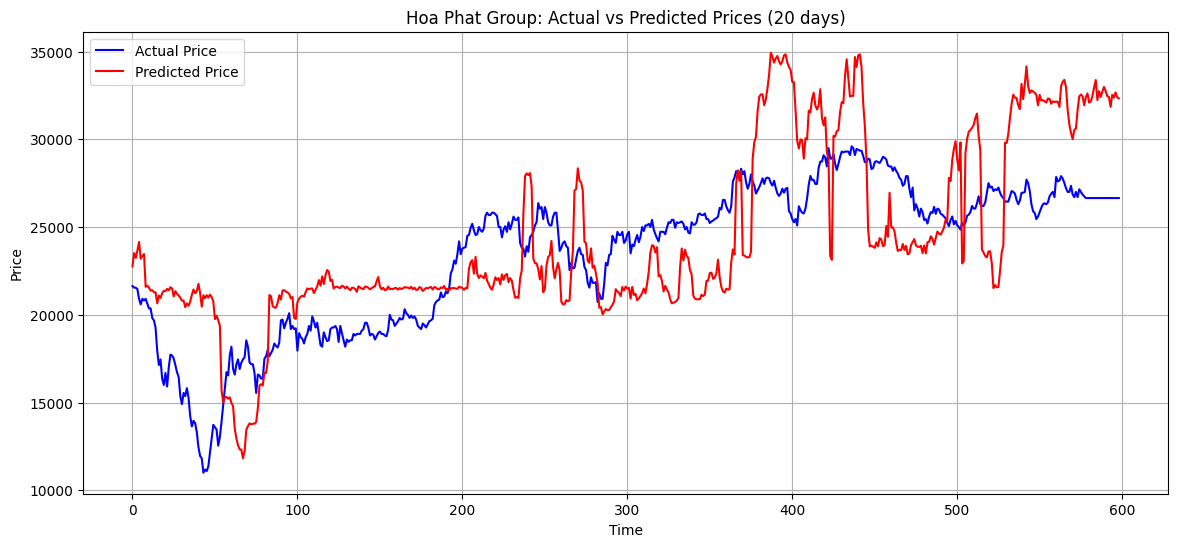

In [31]:
bombardino(hpg, 'Hoa Phat Group', model_xgbr_raw)

## FPT Group

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 837707271.99
R^2 Score: 0.07


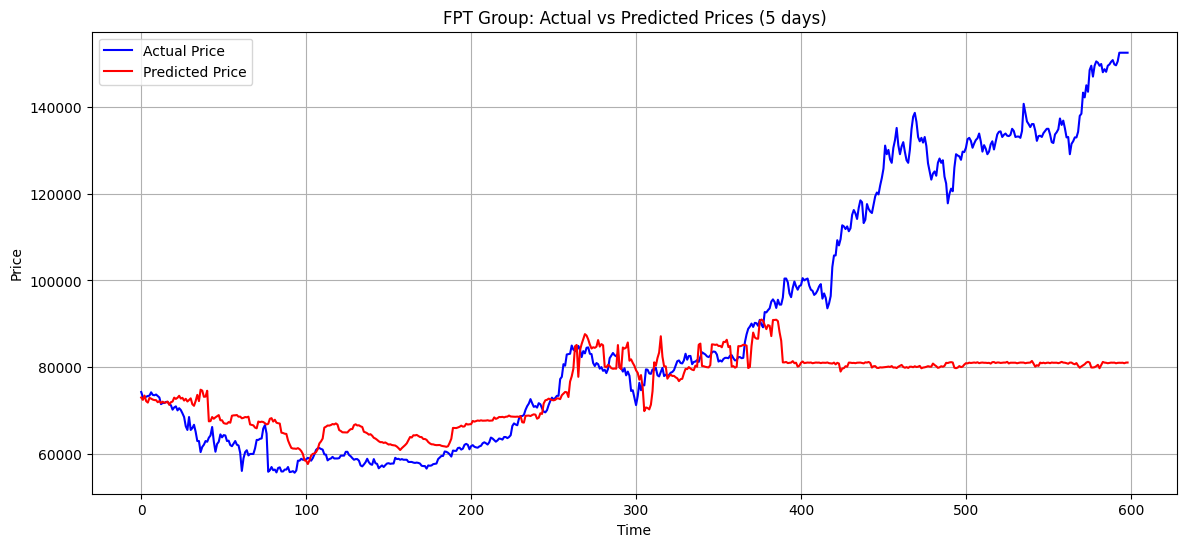

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 1300389992.24
R^2 Score: -0.40


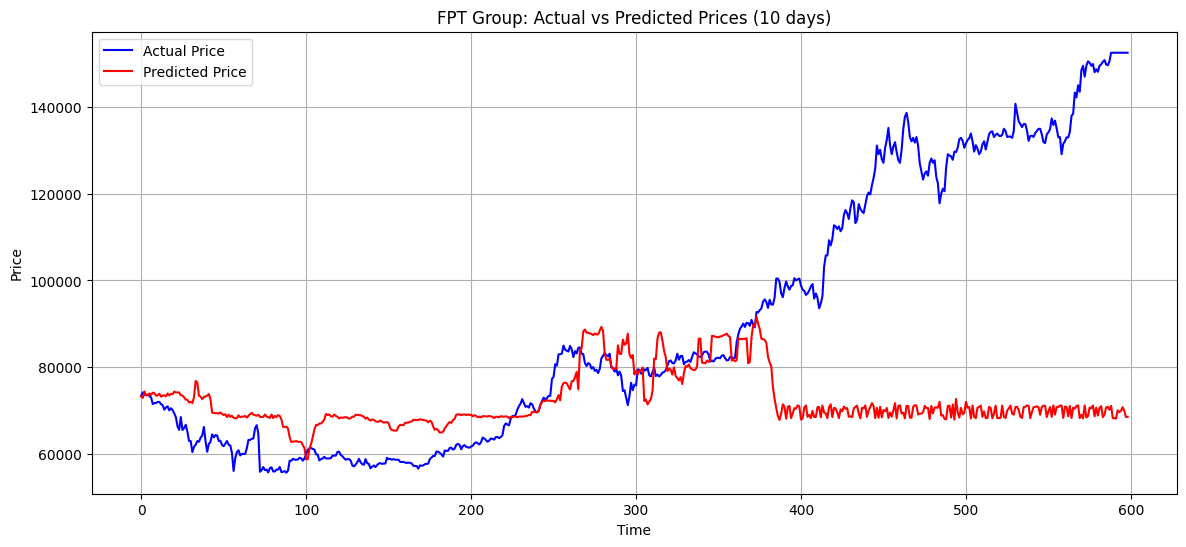

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 1414564335.14
R^2 Score: -0.43


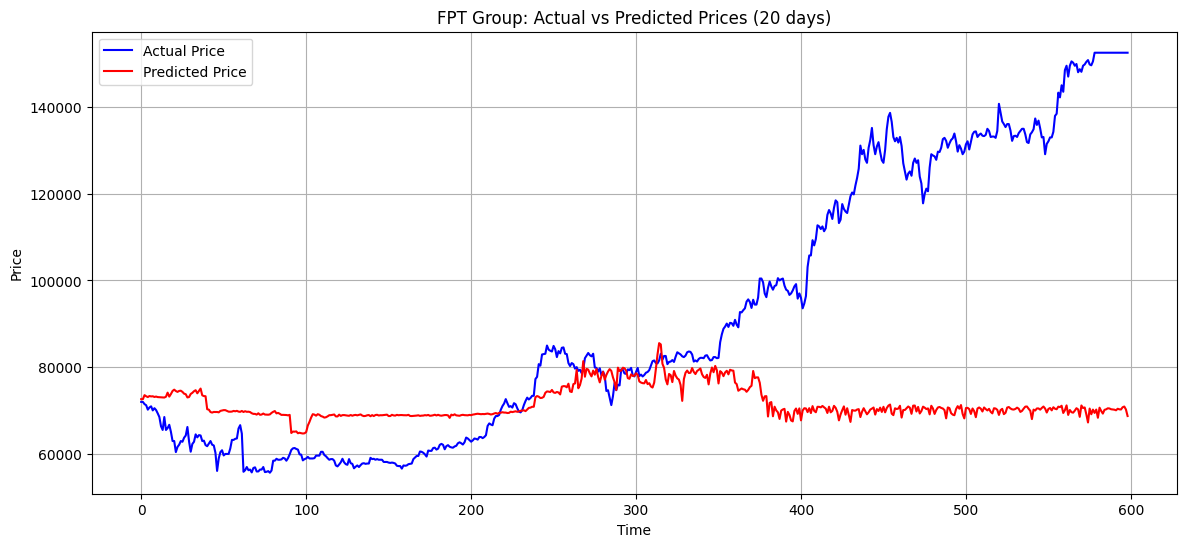

In [32]:
bombardino(fpt, 'FPT Group', model_xgbr_raw)

## MB Bank

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 2088098.95
R^2 Score: 0.79


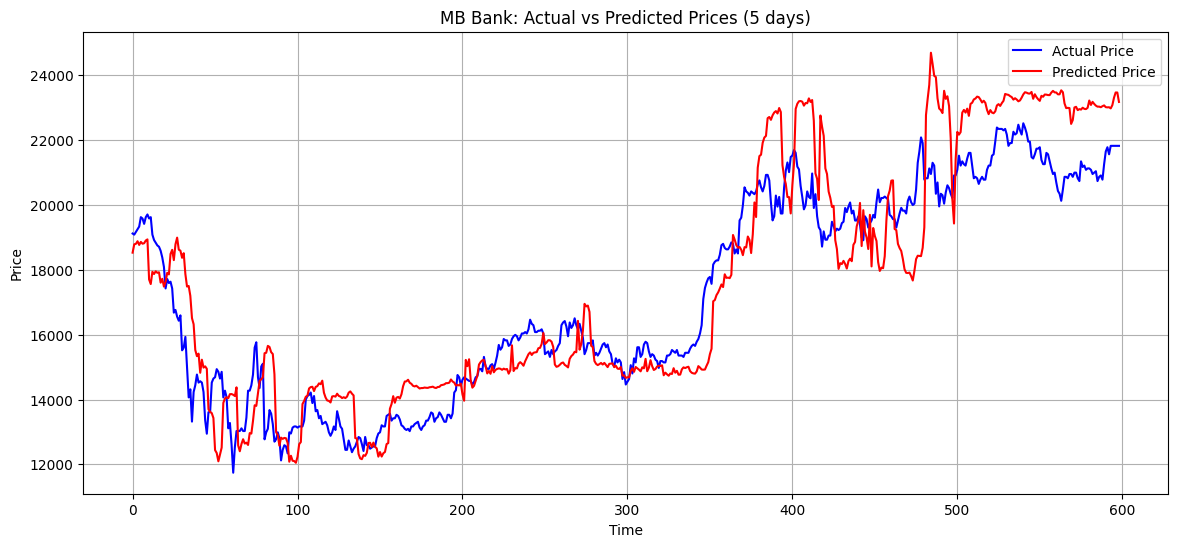

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 2914767.06
R^2 Score: 0.71


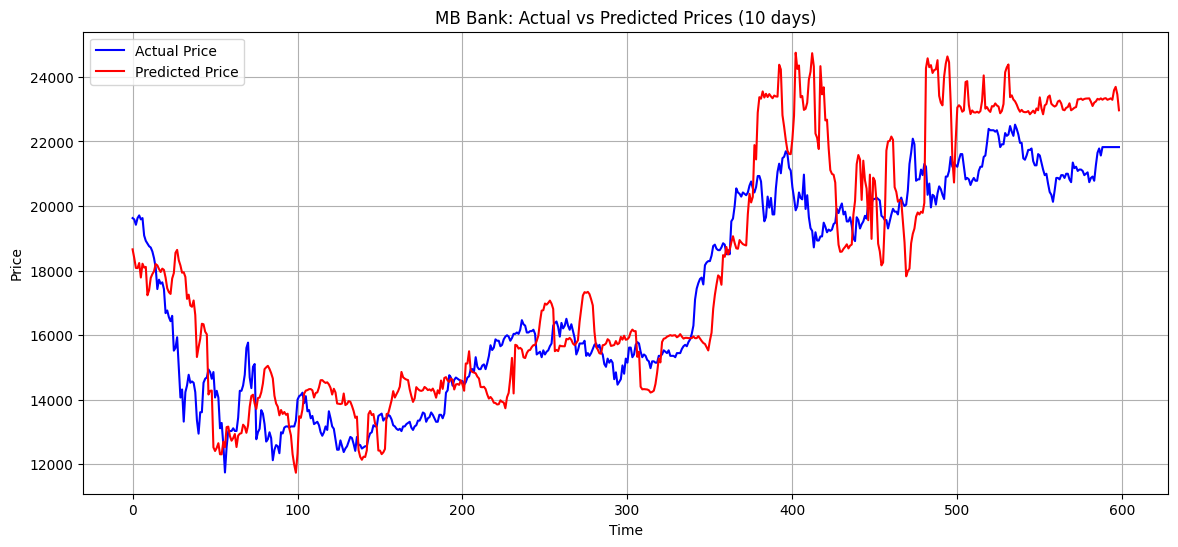

(2395, 9) (599, 9) (2395, 1) (599, 1)
Mean Squared Error (MSE): 5193382.82
R^2 Score: 0.50


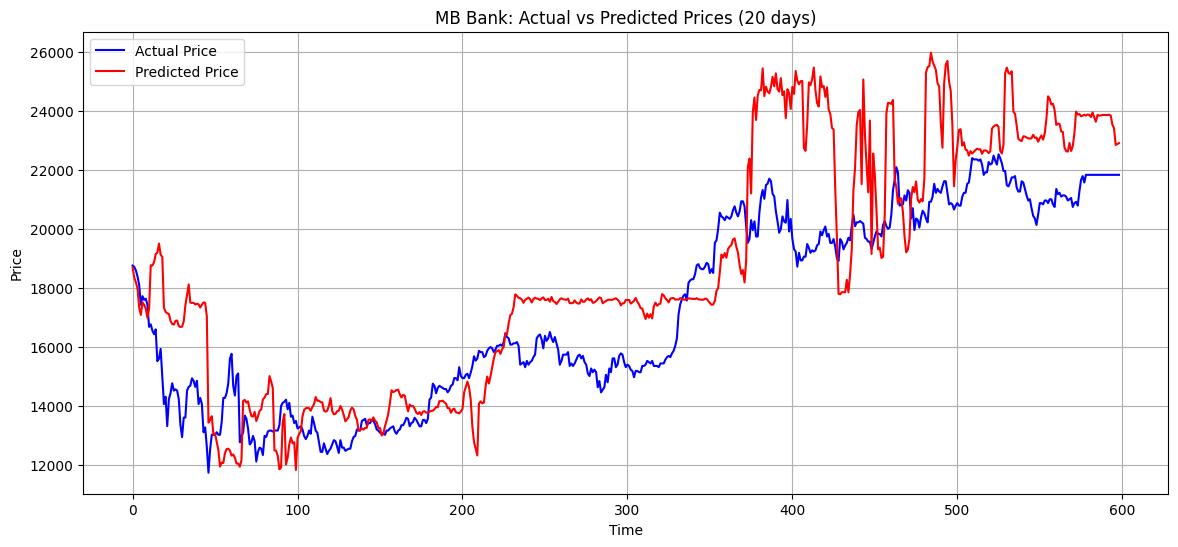

In [33]:
bombardino(mbb, 'MB Bank', model_xgbr_raw)

# Kết hợp 2 mô hình trên cùng LSTM

In [34]:
from tensorflow.keras.layers import Input
import joblib

In [35]:
names_to_datas = {"vnm": [vnm, "Vinamilk"], "hag": [hag, "Hoang Anh Gia Lai"], 
                  "hpg": [hpg, "Tap Doan Hoa Phat"], "fpt": [fpt, 'Tap Doan FPT'],
                  "mbb": [mbb, "Ngan Hang Quan Doi MB"]}

In [36]:
def tralalelo(code: str, n: str):

    tbl = names_to_datas[code][0]
    name = names_to_datas[code][1]

    X_train, X_test, y_train, y_test = prepare_data_for_predicting_n_days_ahead(tbl, n)
    
    X_train_lstm = np.expand_dims(X_train.values, axis=1)  # shape: (samples, 1, features)
    X_test_lstm = np.expand_dims(X_test.values, axis=1)

    y_train_lstm = y_train.values
    y_test_lstm = y_test.values

    # Assume X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm đã có như phần trên
    model_lstm = Sequential([
        Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  # ✅ thay thế input_shape ở đây
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(1)
    ])

    model_lstm.compile(loss='mse', optimizer='adam')
    model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
    lstm_pred = model_lstm.predict(X_test_lstm).flatten()

    model_rfr.fit(X_train, y_train.values.ravel())
    model_xgbr.fit(X_train, y_train.values.ravel())

    best_rf = model_rfr.best_estimator_
    best_xgb = model_xgbr.best_estimator_
    
    # Lấy output của 2 model
    rf_pred = best_rf.predict(X_test)
    xgb_pred = best_xgb.predict(X_test)

    # Combine feature để huấn luyện meta-model
    stacked_pred = np.vstack((rf_pred, xgb_pred, lstm_pred)).T

    # Train meta-model
    meta_model = Ridge(alpha=1.0)
    meta_model.fit(stacked_pred, y_test)

    # Đánh giá
    final_pred = meta_model.predict(stacked_pred)
    
    rmse = mean_squared_error(y_test, final_pred, squared=False)
    r2 = r2_score(y_test, final_pred)
    mape = mean_absolute_percentage_error(y_test, final_pred)
    accuracy = 100 * (1 - mape)
    print("RMSE của mô hình stack:", rmse)
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape*100:.2f}%")
    print(f"Accuracy (ước lượng): {accuracy:.2f}%")

    plot_the_diff(y_test, final_pred, n, name)
    joblib.dump(meta_model, f'/kaggle/working/{code}_{n}_days.pkl')

(2294, 9) (574, 9) (2294, 1) (574, 1)


I0000 00:00:1746892516.106246      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/20


I0000 00:00:1746892520.691504      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 10990053376.0000 - val_loss: 5285779456.0000
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10798277632.0000 - val_loss: 5285372928.0000
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10963098624.0000 - val_loss: 5284620288.0000
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10797614080.0000 - val_loss: 5284104192.0000
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10922180608.0000 - val_loss: 5283666432.0000
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10848757760.0000 - val_loss: 5283281408.0000
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10844518400.0000 - val_loss: 5282928640.0000
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10827894784.0000 - val_loss: 5282598912.0000
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10874079232.0000 - val_loss: 5282285056.0000
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10893659136.0000 - val_l

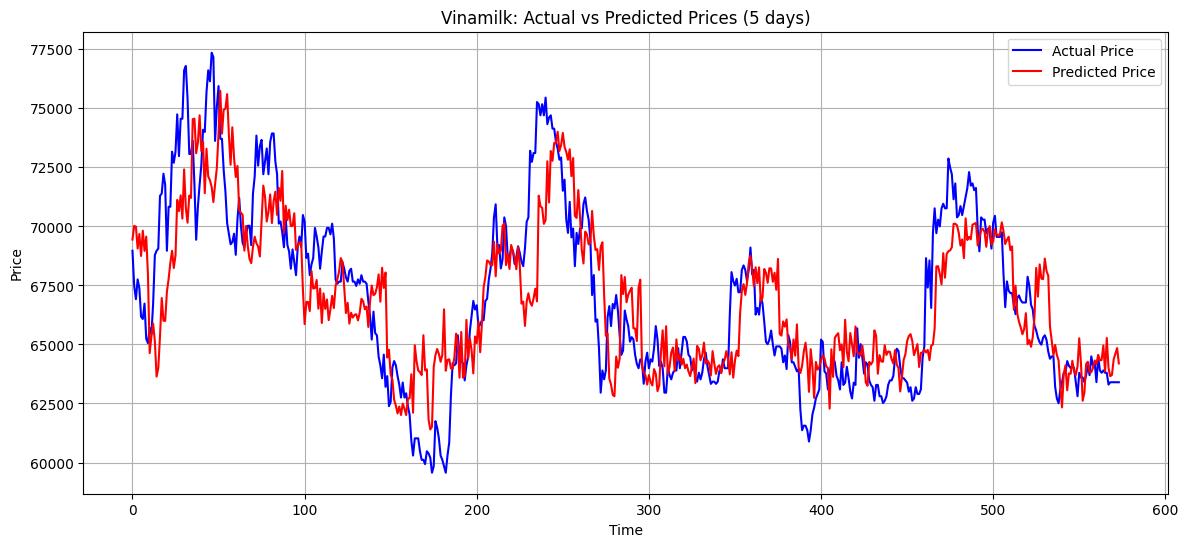

(2294, 9) (574, 9) (2294, 1) (574, 1)
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 10857300992.0000 - val_loss: 5230659584.0000
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10790003712.0000 - val_loss: 5229973504.0000
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11005564928.0000 - val_loss: 5229466112.0000
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10916571136.0000 - val_loss: 5229051392.0000
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11006393344.0000 - val_loss: 5228731392.0000
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10959683584.0000 - val_loss: 5228435456.0000
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11063355392.0000 - val_loss: 5228151296.0000
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11162551296.0000 - val_loss: 5227876864.0000
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10813681664.0000 - val_loss: 5227610112.0000
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━

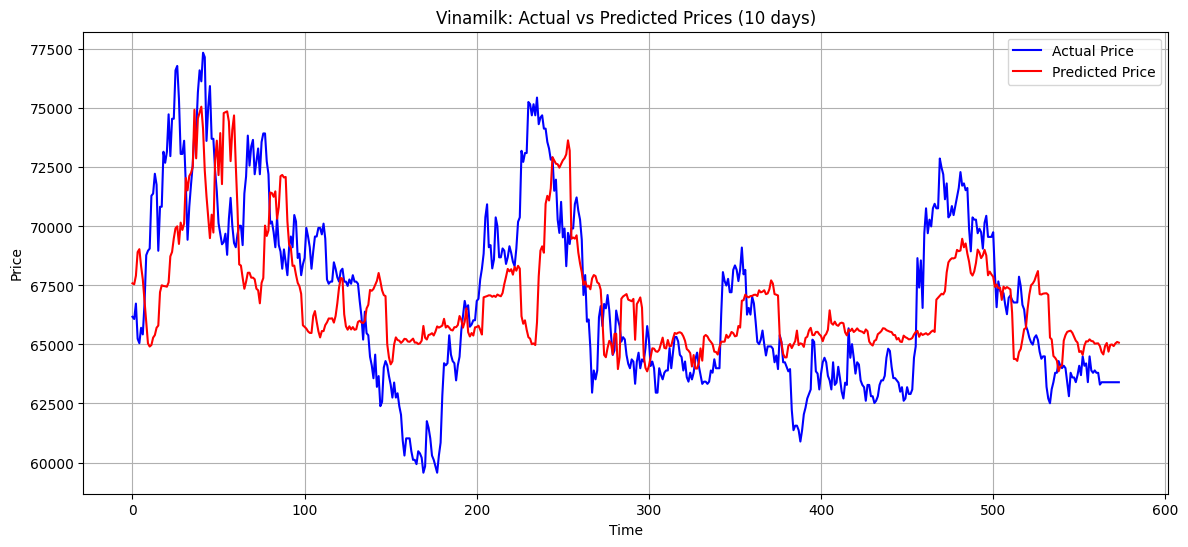

(2294, 9) (574, 9) (2294, 1) (574, 1)
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 10984138752.0000 - val_loss: 5118572544.0000
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10839439360.0000 - val_loss: 5117975040.0000
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10994704384.0000 - val_loss: 5117503488.0000
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10810082304.0000 - val_loss: 5117161984.0000
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10801358848.0000 - val_loss: 5116855296.0000
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10621591552.0000 - val_loss: 5116569088.0000
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10857587712.0000 - val_loss: 5116295680.0000
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10863994880.0000 - val_loss: 5116028928.0000
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10895094784.0000 - val_loss: 5115765760.0000
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━

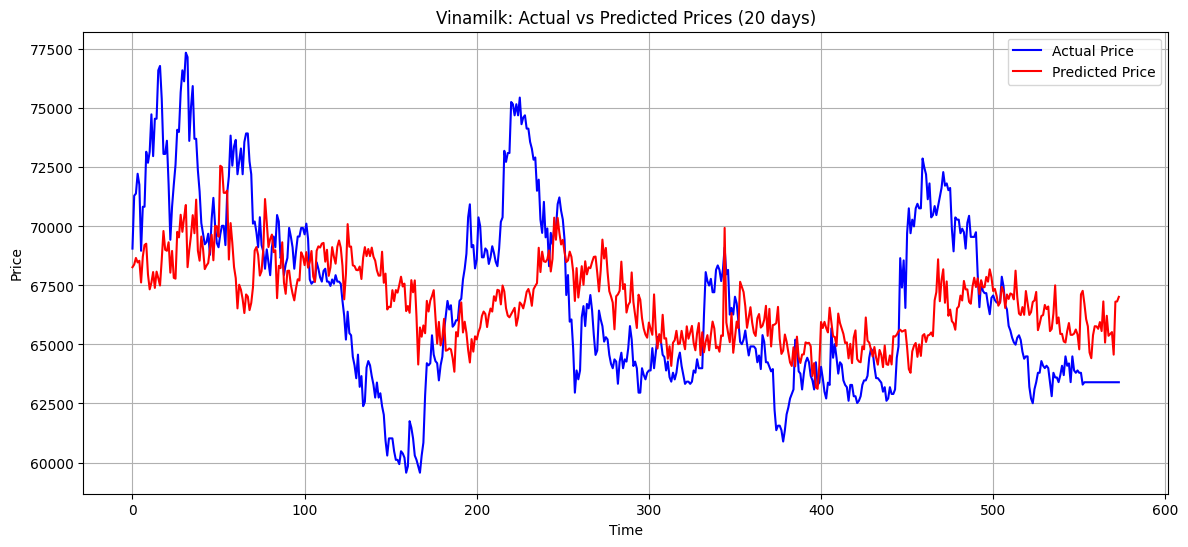

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 160391488.0000 - val_loss: 103470736.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169302240.0000 - val_loss: 103386088.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166668080.0000 - val_loss: 103322296.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172092752.0000 - val_loss: 103271512.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 165418432.0000 - val_loss: 103226696.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 165664784.0000 - val_loss: 103185016.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 175480848.0000 - val_loss: 103145144.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 174559376.0000 - val_loss: 103106800.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167398080.0000 - val_loss: 103069112.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169

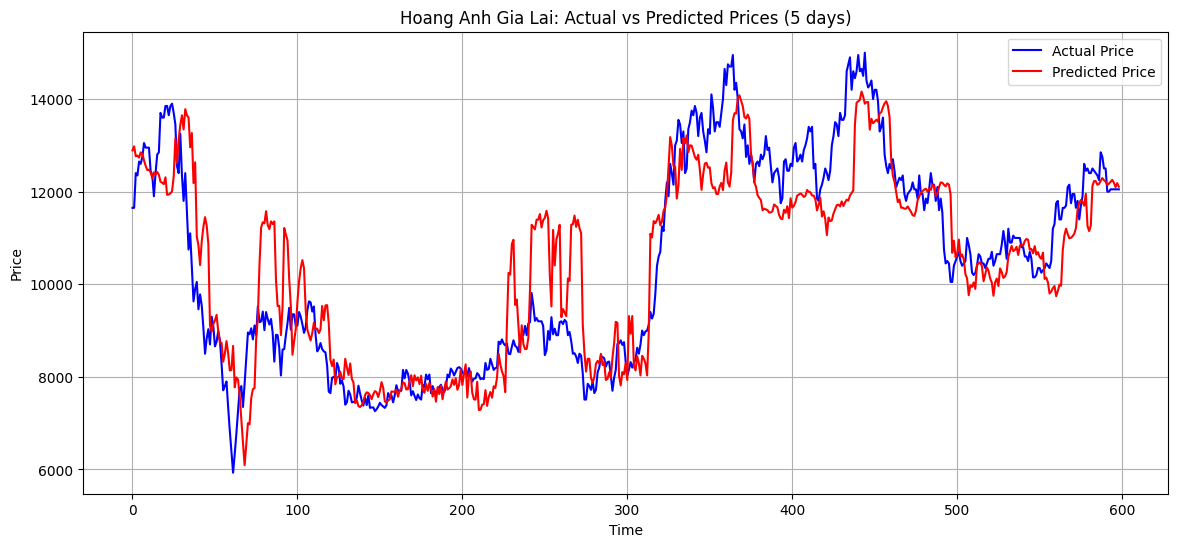

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 171557872.0000 - val_loss: 106021768.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164865360.0000 - val_loss: 105933456.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 162180752.0000 - val_loss: 105861728.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 163246256.0000 - val_loss: 105808096.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171935712.0000 - val_loss: 105760792.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 176266464.0000 - val_loss: 105718248.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178957360.0000 - val_loss: 105677280.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170298816.0000 - val_loss: 105637832.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180961360.0000 - val_loss: 105599472.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16

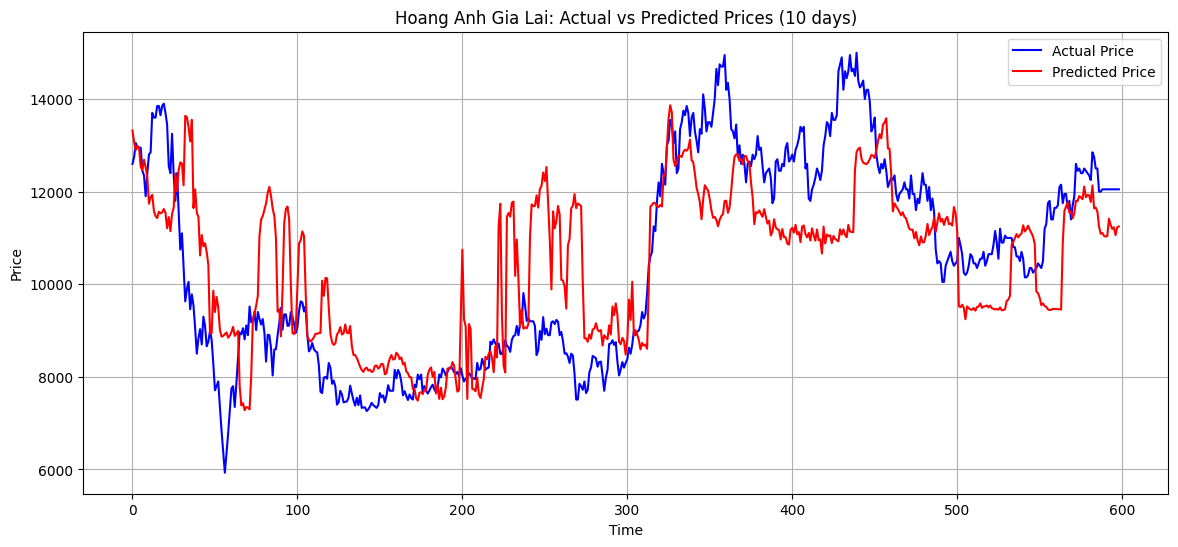

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 163286832.0000 - val_loss: 111575040.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 170603600.0000 - val_loss: 111485096.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 156335760.0000 - val_loss: 111409032.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 166640304.0000 - val_loss: 111349776.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173347184.0000 - val_loss: 111298768.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164822272.0000 - val_loss: 111252336.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168905952.0000 - val_loss: 111208496.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167199056.0000 - val_loss: 111166520.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169893104.0000 - val_loss: 111125888.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16

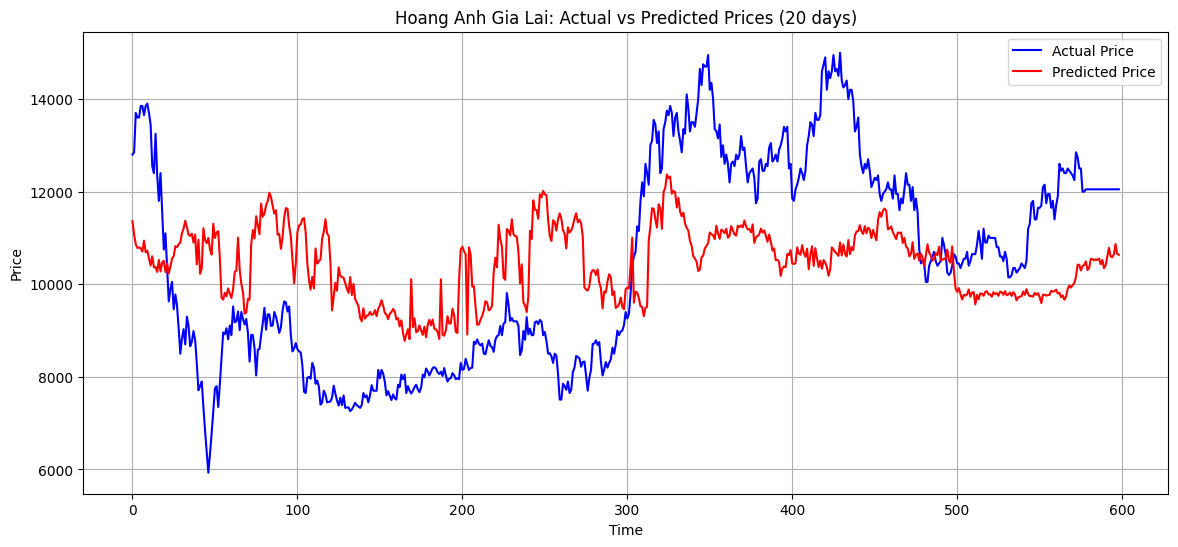

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 143443760.0000 - val_loss: 1095594368.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 150882368.0000 - val_loss: 1095311488.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 144859824.0000 - val_loss: 1095125376.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149999248.0000 - val_loss: 1094973440.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153150224.0000 - val_loss: 1094836480.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159314272.0000 - val_loss: 1094705920.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146158208.0000 - val_loss: 1094579584.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157795280.0000 - val_loss: 1094456960.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149352560.0000 - val_loss: 1094337664.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

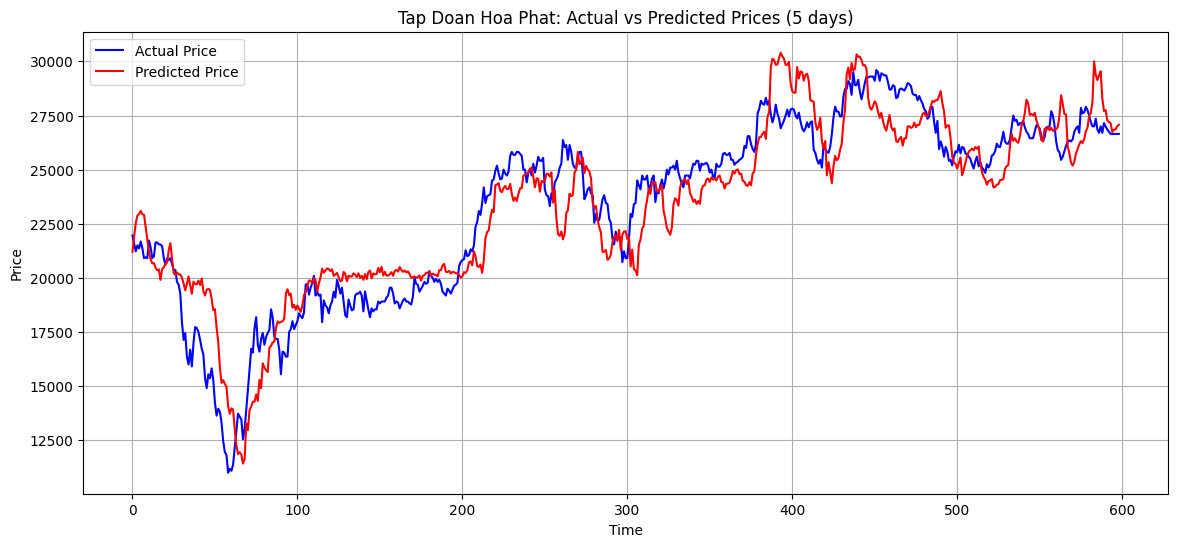

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 152310400.0000 - val_loss: 1074462208.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 165899200.0000 - val_loss: 1074199040.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155844160.0000 - val_loss: 1074011392.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156499200.0000 - val_loss: 1073859712.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 152450880.0000 - val_loss: 1073722624.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146610656.0000 - val_loss: 1073592960.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156472624.0000 - val_loss: 1073467712.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155585808.0000 - val_loss: 1073345984.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158205632.0000 - val_loss: 1073226816.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

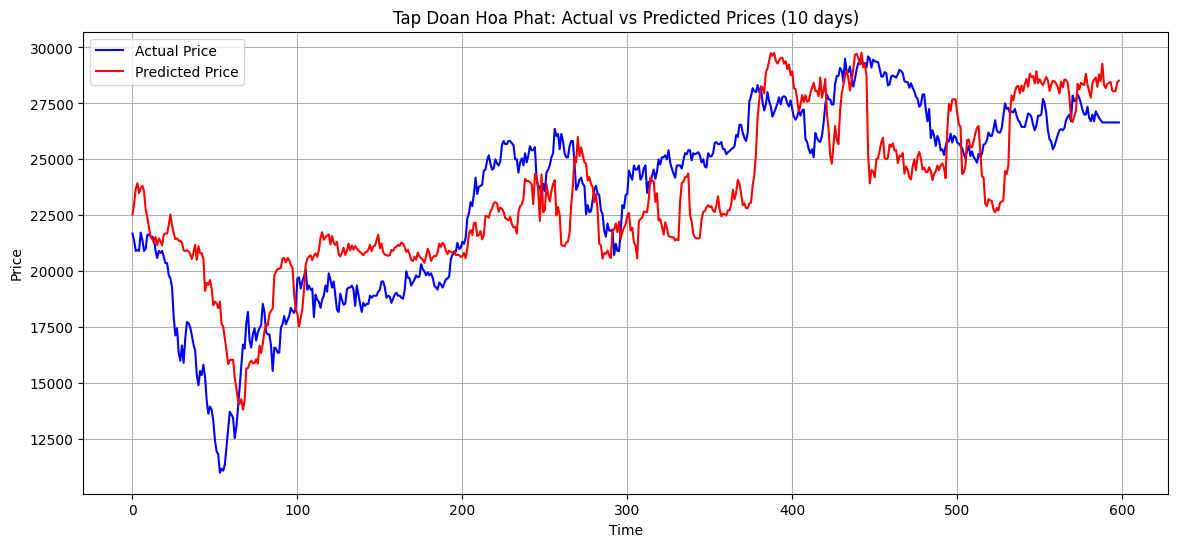

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 170105248.0000 - val_loss: 1030867520.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 162948304.0000 - val_loss: 1030585600.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 174695936.0000 - val_loss: 1030391040.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160140784.0000 - val_loss: 1030237440.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 169709456.0000 - val_loss: 1030100672.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 157079200.0000 - val_loss: 1029972032.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159299136.0000 - val_loss: 1029848000.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169834512.0000 - val_loss: 1029728512.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 163314928.0000 - val_loss: 1029611264.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

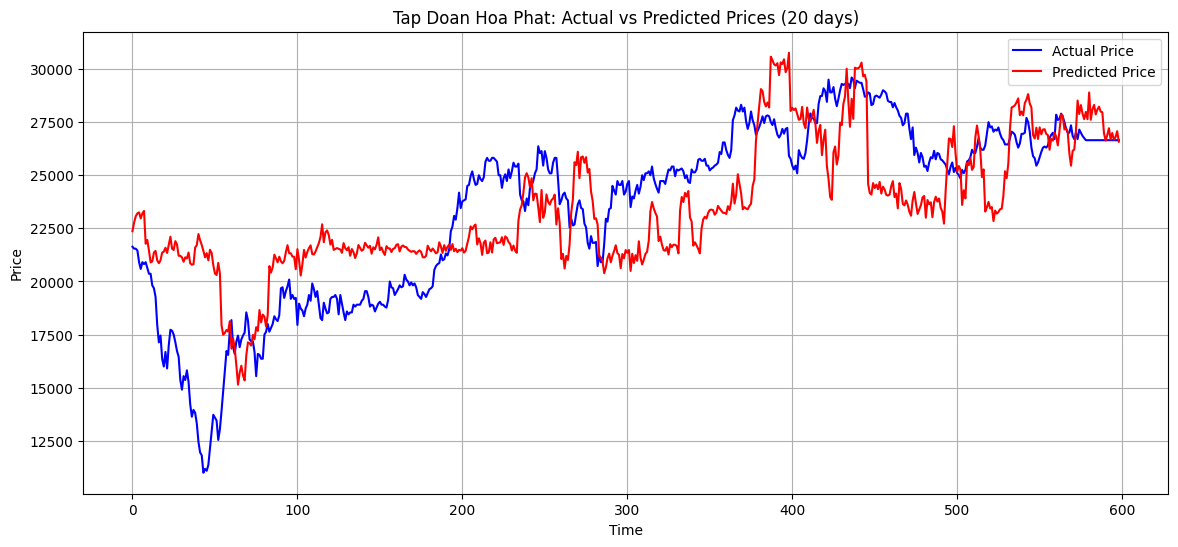

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 722893120.0000 - val_loss: 5997592064.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 738663424.0000 - val_loss: 5996935168.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 739415040.0000 - val_loss: 5996436480.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 713912000.0000 - val_loss: 5996037632.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 716788224.0000 - val_loss: 5995685376.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 728965440.0000 - val_loss: 5995354112.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 720693184.0000 - val_loss: 5995038208.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 747061888.0000 - val_loss: 5994734592.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 714571200.0000 - val_loss: 5994436096.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

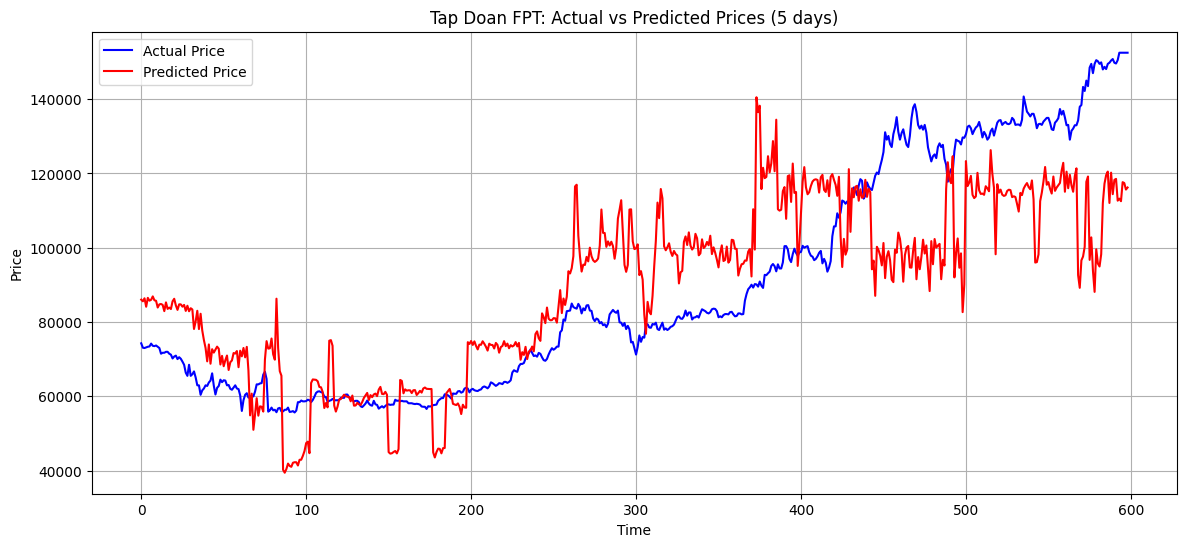

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 709621440.0000 - val_loss: 5986511360.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 741699328.0000 - val_loss: 5985875968.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 720906048.0000 - val_loss: 5985295872.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 705526080.0000 - val_loss: 5984825856.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 709453888.0000 - val_loss: 5984420352.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 784064128.0000 - val_loss: 5984053248.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 714900288.0000 - val_loss: 5983710208.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 729792064.0000 - val_loss: 5983378944.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 670194688.0000 - val_loss: 5983061504.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

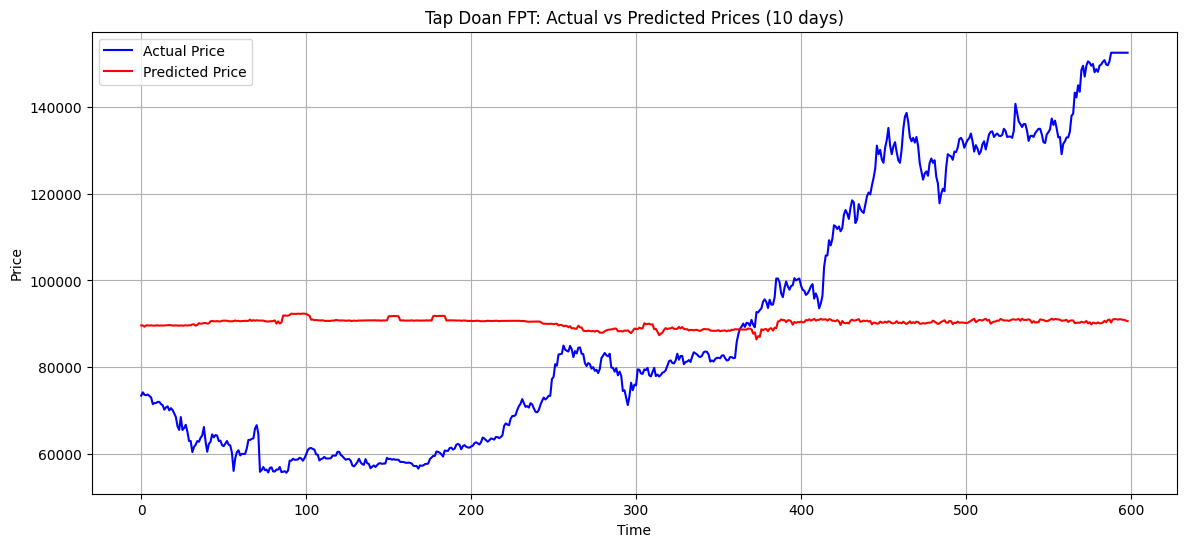

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 762213056.0000 - val_loss: 5959027712.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 769924416.0000 - val_loss: 5958370816.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 729537792.0000 - val_loss: 5957789696.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 737381120.0000 - val_loss: 5957346304.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 786787072.0000 - val_loss: 5956962304.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 818913024.0000 - val_loss: 5956614656.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 724090944.0000 - val_loss: 5956288512.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 790496704.0000 - val_loss: 5955971072.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 755235712.0000 - val_loss: 5955665408.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

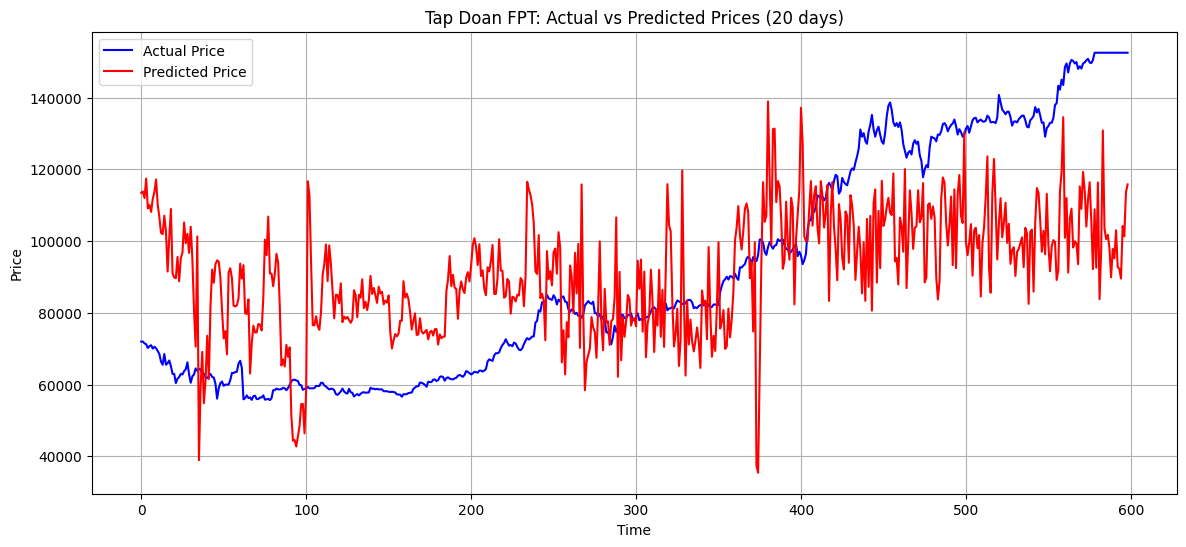

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 94658560.0000 - val_loss: 528062816.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86604368.0000 - val_loss: 527861184.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96119272.0000 - val_loss: 527696224.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89748928.0000 - val_loss: 527572128.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92555864.0000 - val_loss: 527463488.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95084312.0000 - val_loss: 527363552.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99179512.0000 - val_loss: 527269568.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91279216.0000 - val_loss: 527178560.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93184008.0000 - val_loss: 527090176.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86691240.000

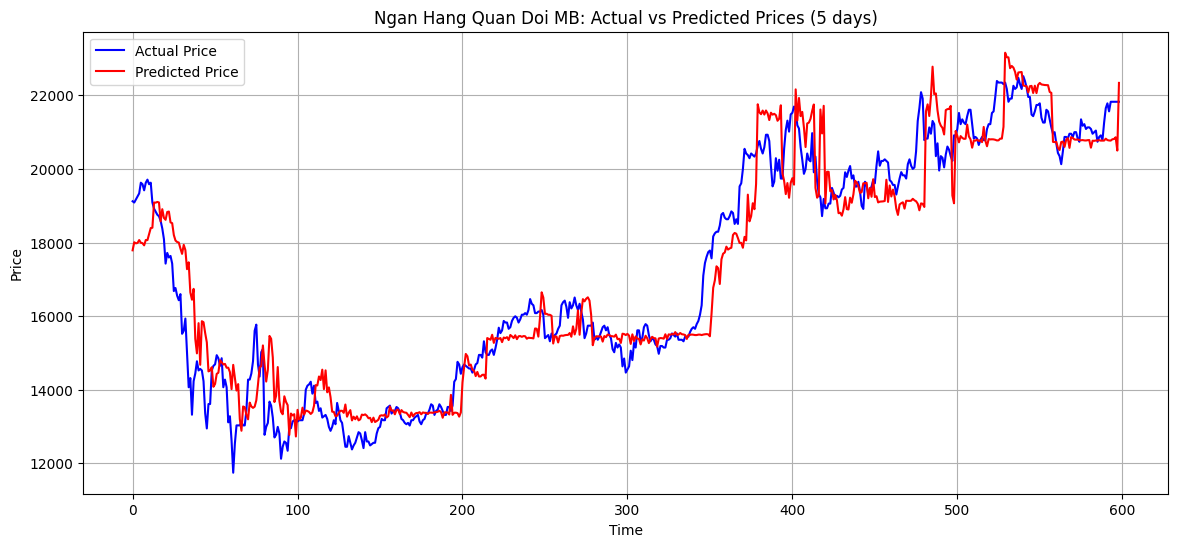

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 91133088.0000 - val_loss: 524138208.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90146680.0000 - val_loss: 523940736.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95716800.0000 - val_loss: 523778080.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94041352.0000 - val_loss: 523648960.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92957696.0000 - val_loss: 523537248.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92607376.0000 - val_loss: 523434592.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96287728.0000 - val_loss: 523337536.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94635592.0000 - val_loss: 523244672.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91845368.0000 - val_loss: 523154528.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91757128.000

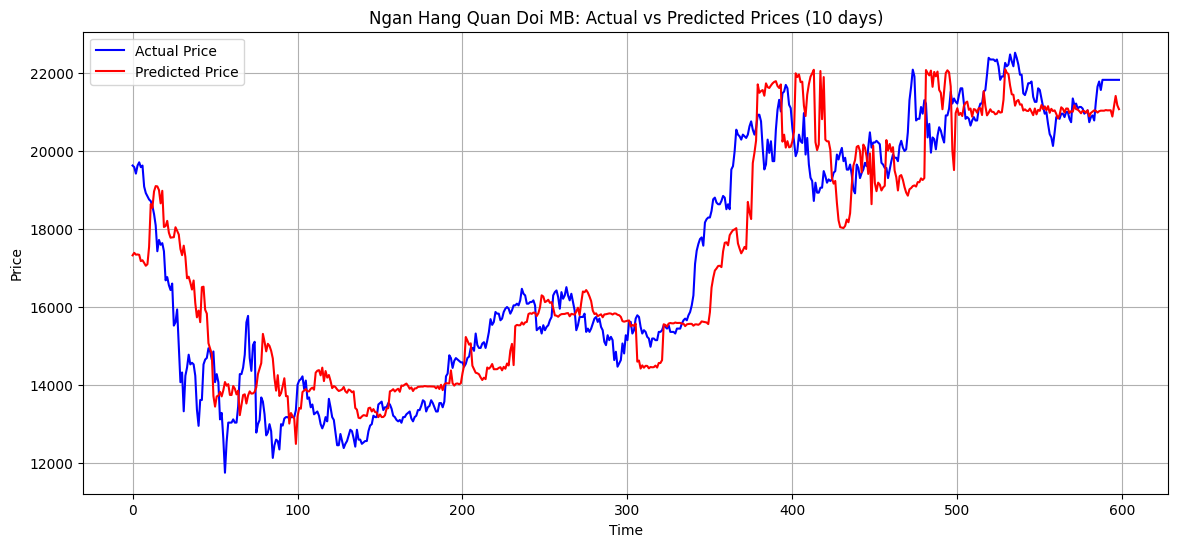

(2395, 9) (599, 9) (2395, 1) (599, 1)
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 92357720.0000 - val_loss: 517315392.0000
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98300096.0000 - val_loss: 517130432.0000
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95600040.0000 - val_loss: 516975648.0000
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96553824.0000 - val_loss: 516850144.0000
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97208296.0000 - val_loss: 516740704.0000
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90587912.0000 - val_loss: 516639840.0000
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96928544.0000 - val_loss: 516543616.0000
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93015840.0000 - val_loss: 516451936.0000
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92222656.0000 - val_loss: 516362912.0000
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98941712.000

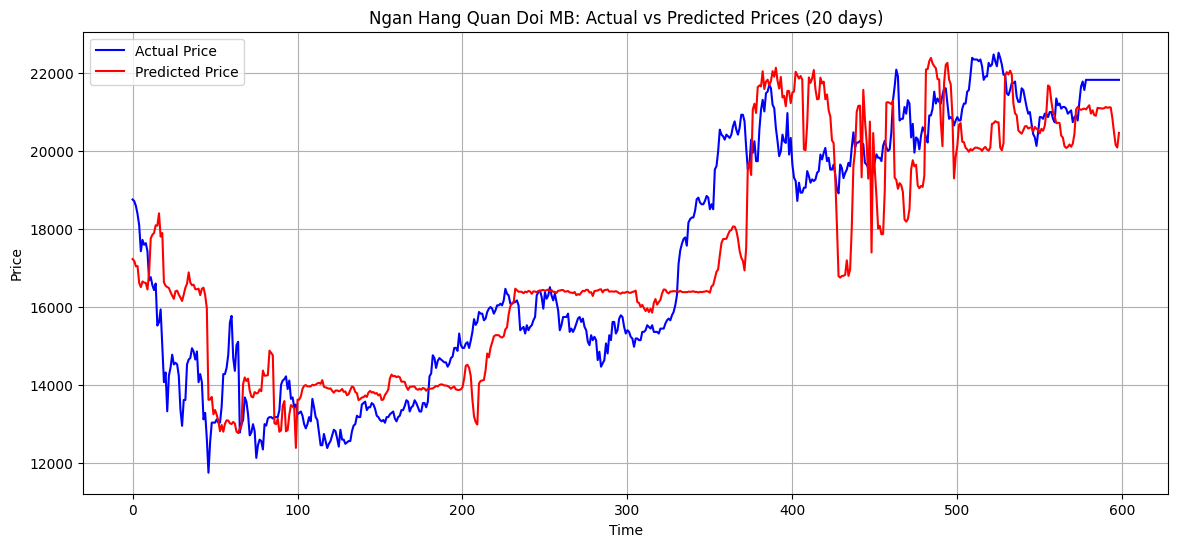

In [37]:
for i in ['vnm', 'hag', 'hpg', 'fpt', 'mbb']:
    for j in ['5', '10', '20']:
        tralalelo(i, j)